# Vaccine Classification

### Problem statement

The objective of this analysis is to develop predictive models that can estimate the likelihood of individuals receiving their H1N1 and seasonal flu vaccines. Using demographic, socioeconomic, behavioral, and opinion-based data collected from respondents, the goal is to create models that accurately predict the probability of vaccination for both the H1N1 and seasonal flu viruses. By understanding the factors associated with vaccination patterns, we aim to provide insights that can inform future public health efforts and strategies for improving vaccine uptake rates.

### Data analysis

We have been provided a dataset comprising 36 columns. The initial column, 'respondent_id,' serves as a unique and randomly assigned identifier. The subsequent 35 features are elaborated upon below:

* age_group: Indicates the age bracket of the respondent.
* education: Reflects the self-reported level of education.
* race: Specifies the racial background of the respondent.
* sex: Identifies the gender of the respondent.
* income_poverty: Denotes the annual household income concerning the 2008 Census poverty thresholds.
* marital_status: Indicates the marital status of the respondent.
* rent_or_own: Specifies the housing situation of the respondent.
* employment_status: Represents the current employment status of the respondent.
* h1n1_concern: Reflects the level of concern regarding the H1N1 flu, ranging from "Not at all concerned" to "Very concerned."
* h1n1_knowledge: Indicates the level of knowledge about the H1N1 flu, varying from "No knowledge" to "A lot of knowledge."
* behavioral_wash_hands: Indicates whether the respondent frequently washes hands or uses hand sanitizer (binary).
* behavioral_large_gatherings: Indicates whether the respondent has reduced time spent at large gatherings (binary).
* behavioral_antiviral_meds: Indicates whether the respondent has taken antiviral medications (binary).
* behavioral_avoidance: Indicates whether the respondent has avoided close contact with others exhibiting flu-like symptoms (binary).
* behavioral_face_mask: Indicates whether the respondent has purchased a face mask (binary).
* behavioral_outside_home: Indicates whether the respondent has reduced contact with people outside their household (binary).
* behavioral_touch_face: Indicates whether the respondent has avoided touching their eyes, nose, or mouth (binary).
* doctor_recc_h1n1: Indicates whether the respondent's doctor recommended the H1N1 flu vaccine (binary).
* doctor_recc_seasonal: Indicates whether the respondent's doctor recommended the seasonal flu vaccine (binary).
* chronic_med_condition: Indicates whether the respondent has any of the specified chronic medical conditions (binary).
* child_under_6_months: Indicates whether the respondent has regular close contact with a child under six months old (binary).
* health_worker: Indicates whether the respondent is a healthcare worker (binary).
* health_insurance: Indicates whether the respondent has health insurance (binary).
* opinion_h1n1_vacc_effective: Reflects the respondent's opinion regarding the effectiveness of the H1N1 vaccine.
* opinion_h1n1_risk: Reflects the respondent's opinion regarding the risk of contracting H1N1 flu without the vaccine.
* opinion_h1n1_sick_from_vacc: Reflects the respondent's concern about falling sick from taking the H1N1 vaccine.
* opinion_seas_vacc_effective: Reflects the respondent's opinion regarding the effectiveness of the seasonal flu vaccine.
* opinion_seas_risk: Reflects the respondent's opinion regarding the risk of contracting seasonal flu without the vaccine.
* opinion_seas_sick_from_vacc: Reflects the respondent's concern about falling sick from taking the seasonal flu vaccine.
* hhs_geo_region: Represents the respondent's residence using a 10-region geographic classification by the U.S. Dept. of Health and Human Services, denoted by short random character strings.
* census_msa: Specifies the respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
* household_adults: Indicates the number of other adults in the respondent's household (top-coded to 3).
* household_children: Indicates the number of children in the respondent's household (top-coded to 3).
* employment_industry: Specifies the industry in which the respondent is employed, represented by short random character strings.
* employment_occupation: Specifies the occupation of the respondent, represented by short random character strings.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# importing libraries for ML analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier


# importing libraries for performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing input features and target labels for processing
features = pd.read_csv('features.csv')
labels = pd.read_csv('labels.csv')

In [3]:
# printing a sample of the features dataset
features.sample(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
20223,20223,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,3.0,2.0,4.0,3.0,4.0,1.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,1.0,0.0,NaN,NaN
3386,3386,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,5.0,4.0,2.0,5.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,ldnlellj,xtkaffoo
10554,10554,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,1.0,5.0,1.0,1.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,atmpeygn,"MSA, Not Principle City",1.0,0.0,NaN,NaN
22366,22366,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,4.0,4.0,1.0,5.0,5.0,1.0,45 - 54 Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,bhuqouqj,Non-MSA,1.0,2.0,NaN,NaN
2213,2213,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,5.0,4.0,2.0,2.0,45 - 54 Years,Some College,Black,Male,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Principle City",1.0,2.0,atmlpfrs,rcertsgn


In [4]:
# printing a sample of the labels dataset
labels.sample(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
26626,26626,0,0
24908,24908,0,1
25608,25608,1,1
19610,19610,0,1
22010,22010,0,1


we can see that the column 'respondent_id' is common between the dataframes

In [5]:
# merging both dataframes into one on 'respondent_id'
data=pd.merge(features,labels,on='respondent_id')

In [6]:
# printing a sample of the merged dataframe
data.sample(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
26652,26652,1.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,3.0,2.0,1.0,55 - 64 Years,< 12 Years,Other or Multiple,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,1.0,NaN,NaN,0,1
256,256,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,1.0,4.0,2.0,2.0,18 - 34 Years,< 12 Years,Hispanic,Male,Below Poverty,Not Married,Rent,Employed,oxchjgsf,"MSA, Principle City",1.0,0.0,xicduogh,rcertsgn,0,0
9906,9906,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,atmlpfrs,hfxkjkmi,0,0
6253,6253,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,0
23516,23516,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,4.0,4.0,5.0,5.0,1.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,qufhixun,Non-MSA,1.0,0.0,fcxhlnwr,xtkaffoo,1,1


In [7]:
# displaying statistical information about the dataset
data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [8]:
# printing other information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
# printing the count of null values in the dataframe
data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

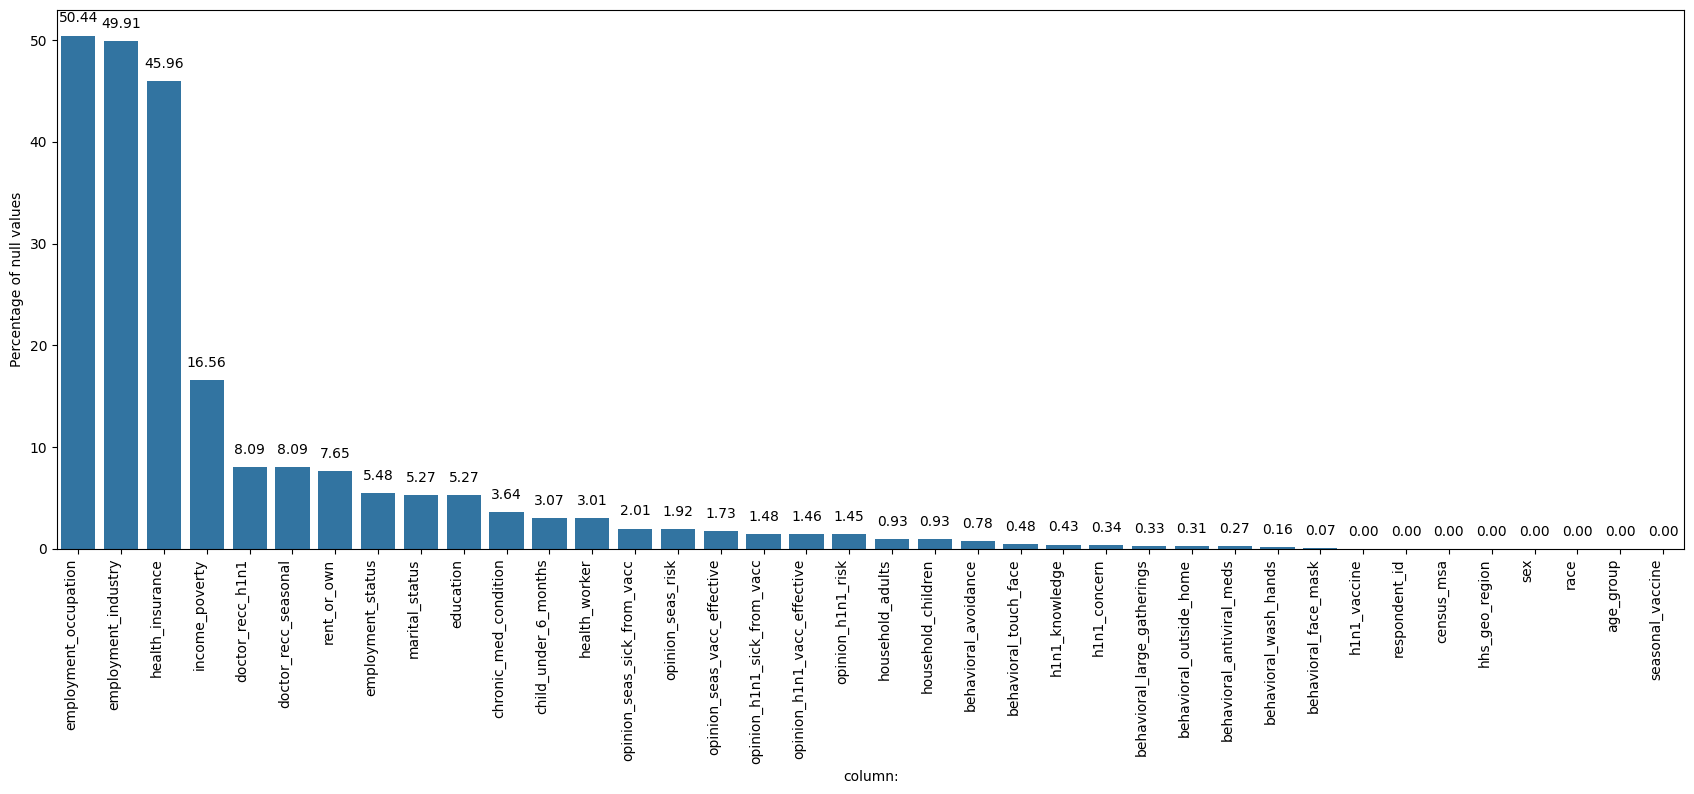

In [10]:
# plotting the percentage of null values in each column as a barplot
#checking for null values and displaying their percentage as a barplot

nv=(data.isnull().sum()*100/len(data))
nv=nv.sort_values(ascending=False)

plt.figure(figsize=(21,7))#initialising the plot
sns.barplot(x=nv.index,y=nv)
plt.xlabel('column:')
plt.ylabel('Percentage of null values')
plt.xticks(rotation=90,ha='right')

for i,v in enumerate(nv):
    plt.text(i,v+1,f"{v:.2f}",ha='center',va='bottom',fontsize=10)

plt.show()

we can see that three columns have a high percentage of null values, namely columns 'employment_occupation','employment_industry' and 'health_insurance'.
these columns would need to be dropped

In [11]:
data.drop(columns=['employment_occupation','employment_industry','health_insurance'],inplace=True)

In [12]:
# checking for null values
data.duplicated().sum()

0

we can see that there are no duplicate entries in the dataframe thus no action is required

In [13]:
#displaying correlation matrix of the dataframe
corrmat=data.corr(numeric_only=True)
corrmat.style.background_gradient()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,-0.002072,0.001500,0.005797,-0.004839,-0.003149,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280,-0.004652
h1n1_concern,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,0.135567,0.095162,0.049574,0.033562,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929,0.154828
h1n1_knowledge,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,0.071920,-0.022602,0.021598,0.170252,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951,0.120152
behavioral_antiviral_meds,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,0.030909,0.008465,0.028788,0.009465,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608,0.006277
behavioral_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,0.074088,0.039435,-0.000414,0.001180,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690,0.076395
behavioral_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,0.069481,0.068113,0.039726,0.069992,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498,0.050083
behavioral_wash_hands,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,0.102044,0.030260,0.036188,0.053761,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712,0.112414
behavioral_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,0.093557,0.104721,0.021168,-0.032319,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822,0.064025
behavioral_outside_home,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,0.085622,0.098858,0.018195,-0.034619,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768,0.053509
behavioral_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,0.100808,0.028876,0.026640,0.067648,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648,0.120228


In [14]:

# displaying the list of correlations between the columns in the dataset in descending order
ut=corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))
corr_pairs=ut.stack()
corr_pairs=corr_pairs[abs(corr_pairs)<1]
sorted_corr=corr_pairs.abs().sort_values(ascending=False)

sorted_corr

doctor_recc_h1n1             doctor_recc_seasonal           0.591868
behavioral_large_gatherings  behavioral_outside_home        0.584085
opinion_h1n1_risk            opinion_seas_risk              0.564208
opinion_h1n1_sick_from_vacc  opinion_seas_sick_from_vacc    0.491546
opinion_h1n1_vacc_effective  opinion_seas_vacc_effective    0.472467
                                                              ...   
behavioral_avoidance         health_worker                  0.001180
respondent_id                opinion_h1n1_risk              0.000958
behavioral_touch_face        household_adults               0.000553
behavioral_avoidance         child_under_6_months           0.000414
respondent_id                household_adults               0.000187
Length: 300, dtype: float64

we can see that none of the columns have high correaltions, thus there is no need to perform any operation.

In [15]:
#displaying the value counts of each unique value in each column of the dataset
for i in data.columns:
    if i!='respondent_id':
        print(i)
        print(data[i].value_counts())
        print('-----------------')

h1n1_concern
h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
-----------------
h1n1_knowledge
h1n1_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64
-----------------
behavioral_antiviral_meds
behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64
-----------------
behavioral_avoidance
behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64
-----------------
behavioral_face_mask
behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64
-----------------
behavioral_wash_hands
behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64
-----------------
behavioral_large_gatherings
behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64
-----------------
behavioral_outside_home
behavioral_outside_home
0.0    17644
1.0     8981
Name: count, dtype: int64
-----------------
behavioral_touch_face
behavioral_touch_face
1.0    18001
0.0 

### Imputing Null values

In [16]:
#filling the missing values in all columns containing numerical values with mode, as all columns contain categorical values
n_cols=['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children']
mode_val=data[n_cols].mode().iloc[0]

data[n_cols]=data[n_cols].fillna(mode_val)

In [17]:
#now lets fill the null values with a new category called N/A in other columns containing strings
c_cols=['age_group','education', 'race', 'sex', 'income_poverty',
       'marital_status','rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa']

data[c_cols]=data[c_cols].fillna('N/A')

In [18]:
# checking for null values again
data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

### Outlier Handling

In [19]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
# Select numerical columns for outlier detection
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical column and detect outliers using IQR
for column in numerical_columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Print column name and count of outliers
    if not outliers.empty:
        print(f"Outliers in '{column}': {len(outliers)}")


Outliers in 'behavioral_antiviral_meds': 1301
Outliers in 'behavioral_face_mask': 1841
Outliers in 'behavioral_wash_hands': 4650
Outliers in 'doctor_recc_h1n1': 5408
Outliers in 'child_under_6_months': 2138
Outliers in 'health_worker': 2899
Outliers in 'opinion_seas_vacc_effective': 3427
Outliers in 'opinion_seas_sick_from_vacc': 6573
Outliers in 'household_adults': 1125
Outliers in 'household_children': 1747
Outliers in 'h1n1_vaccine': 5674


## EDA

### Univariate analysis

In [20]:
data.drop('respondent_id',axis=1,inplace=True)

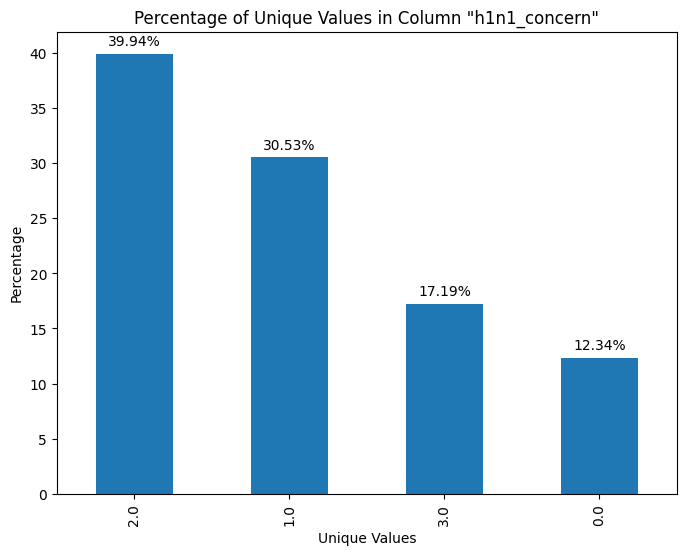

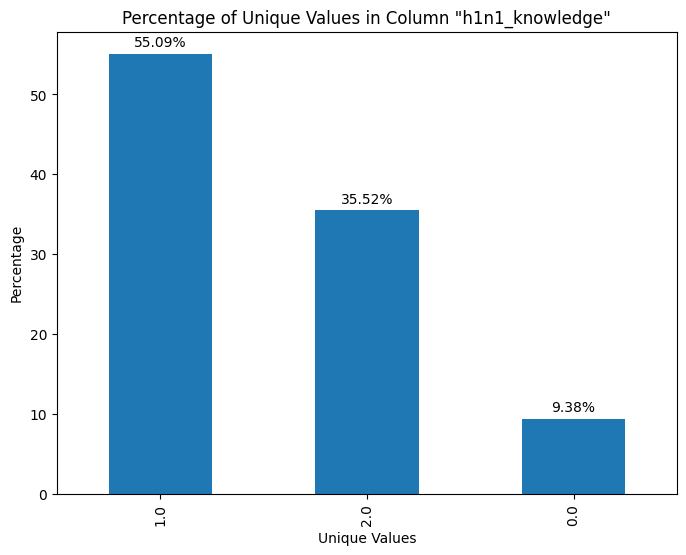

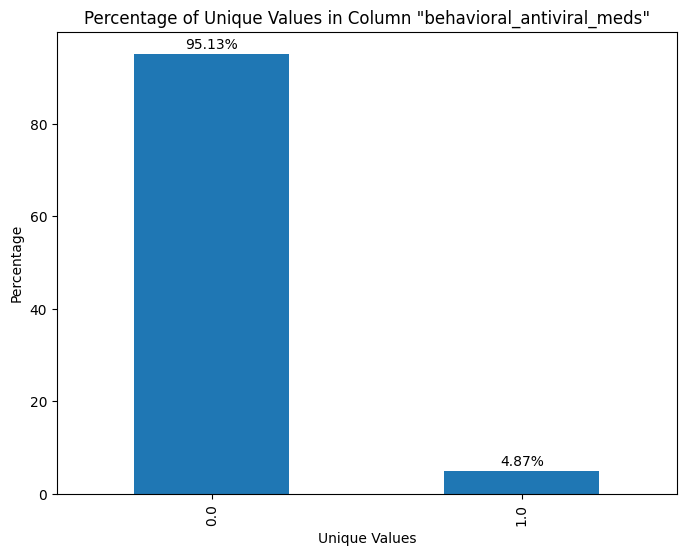

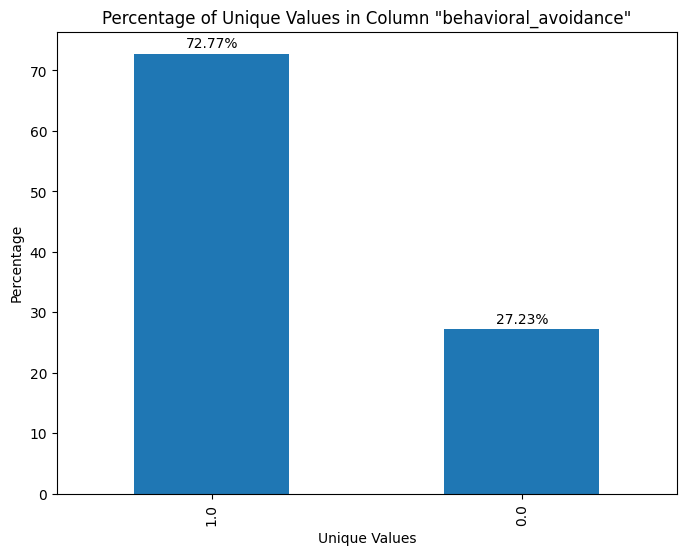

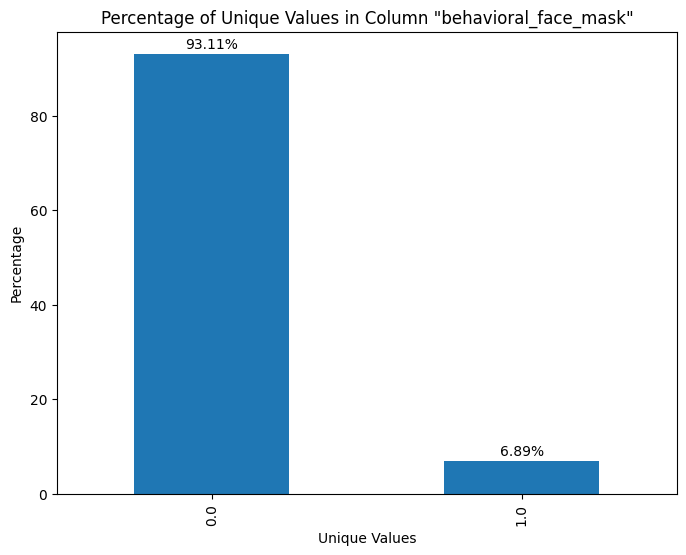

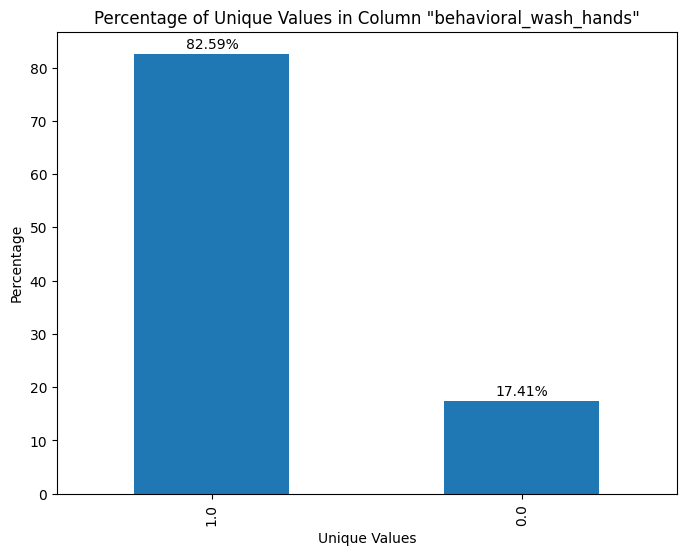

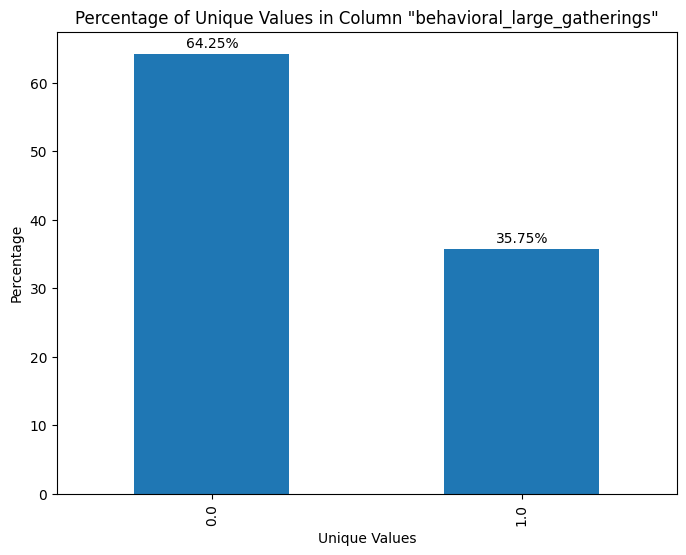

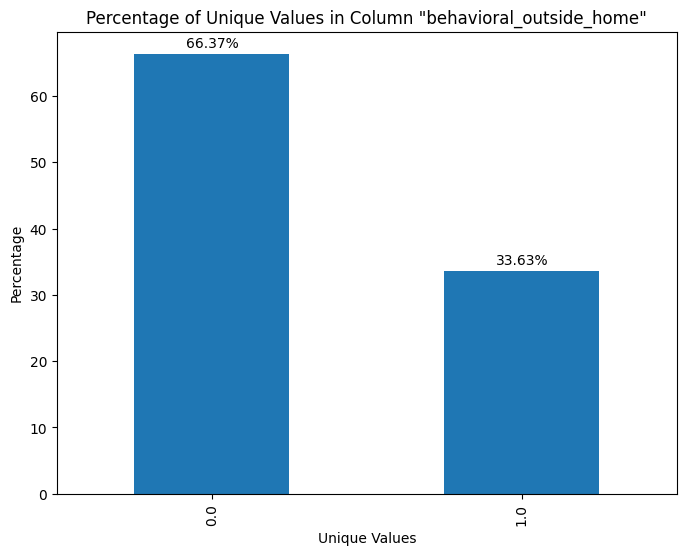

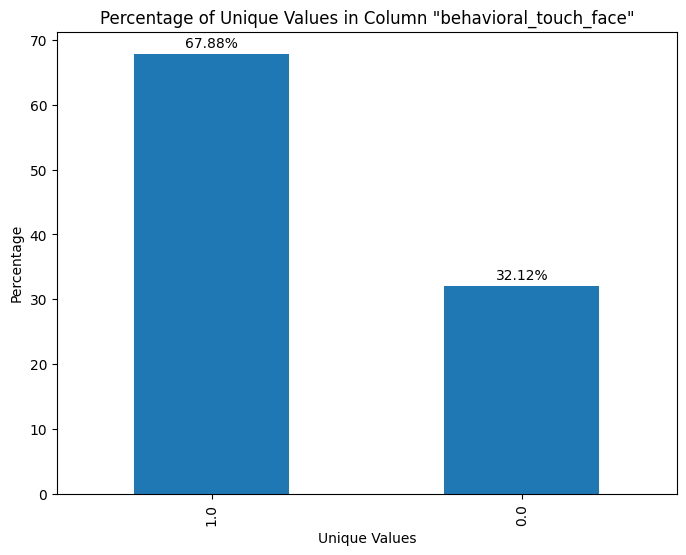

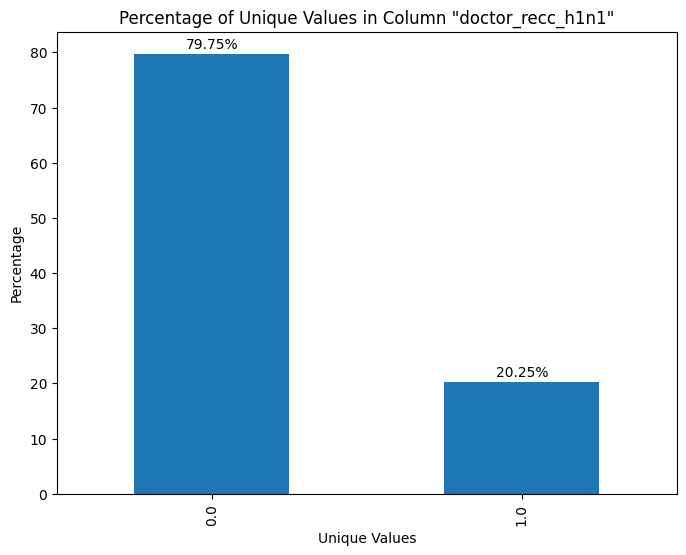

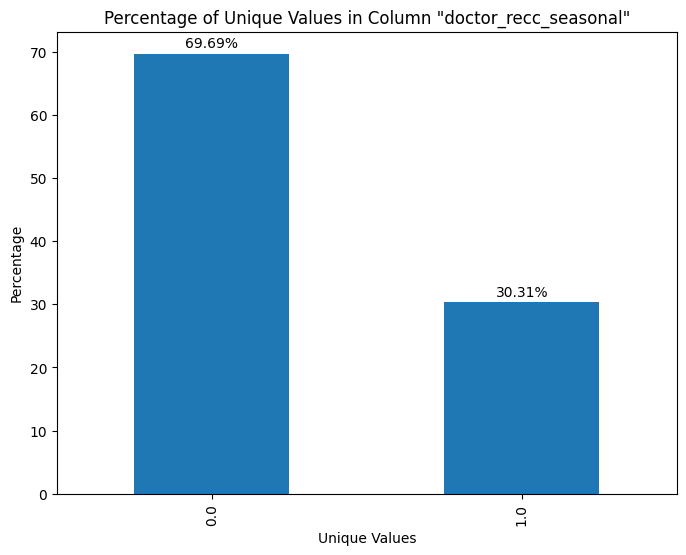

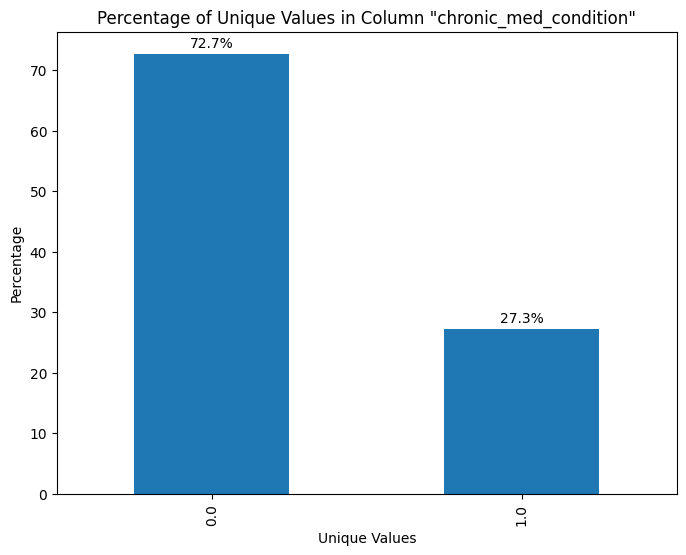

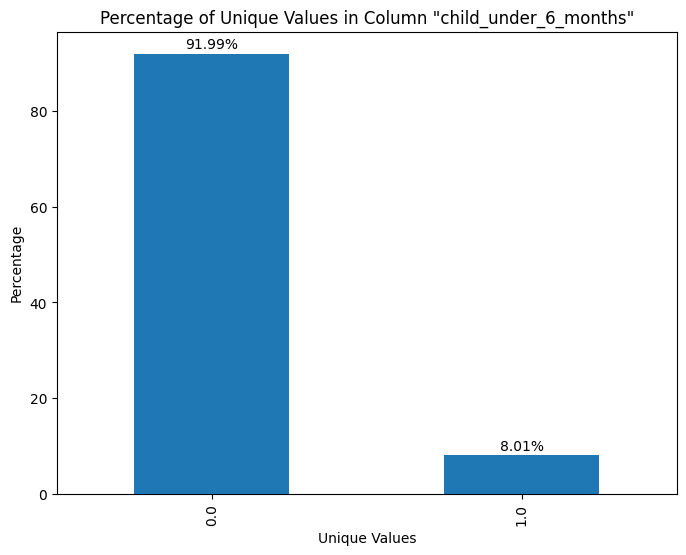

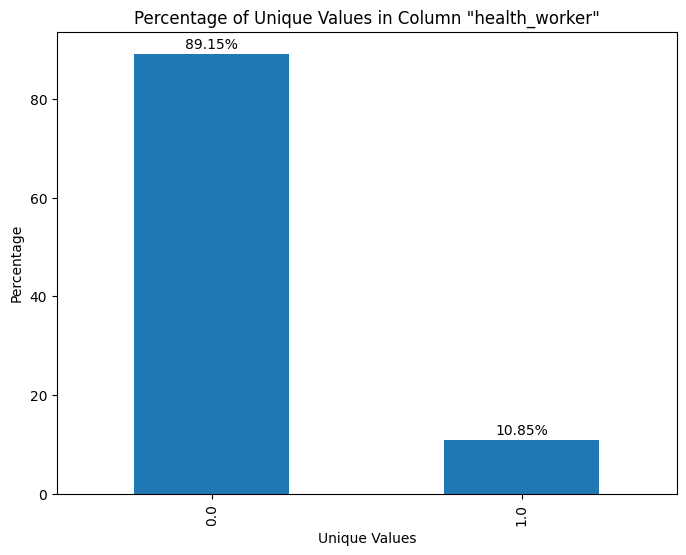

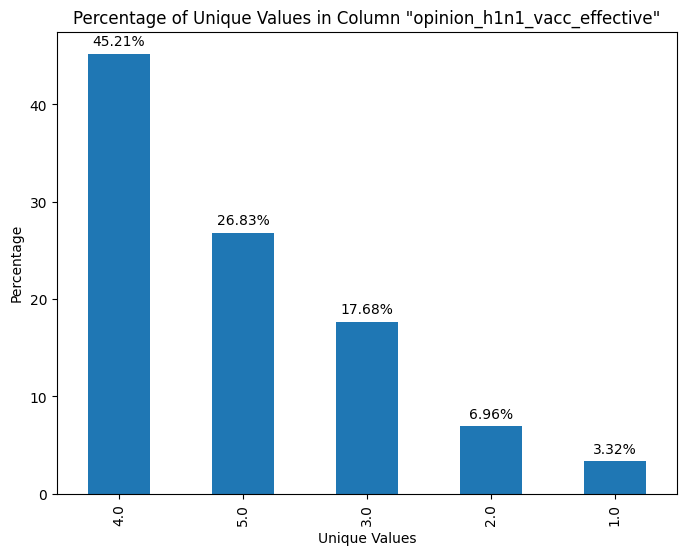

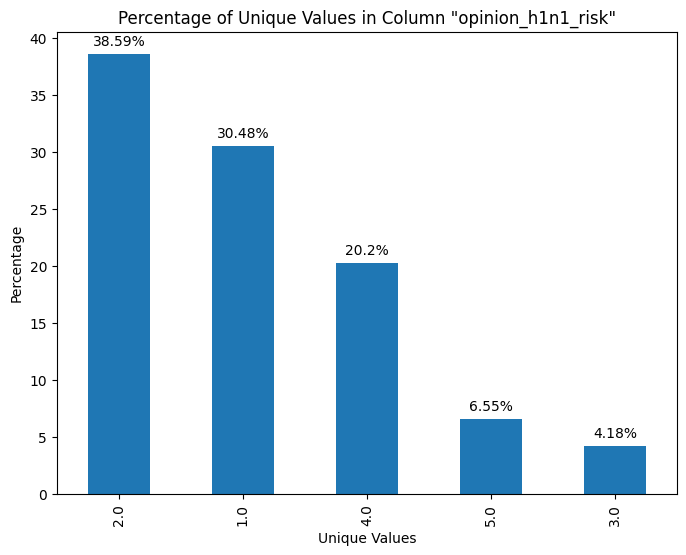

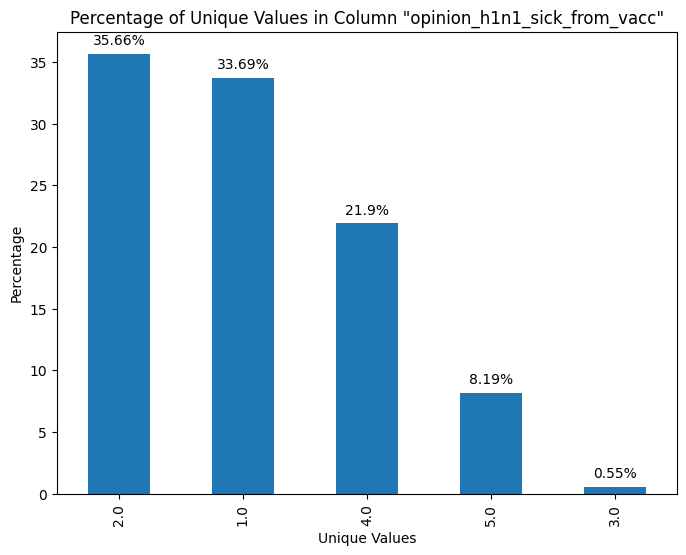

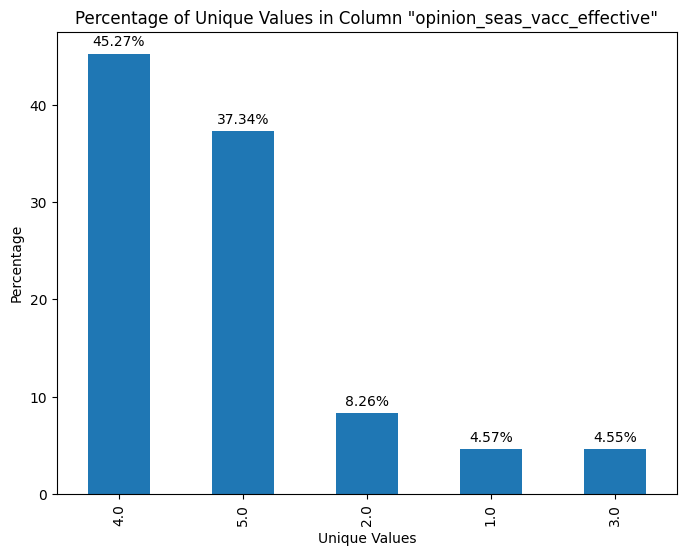

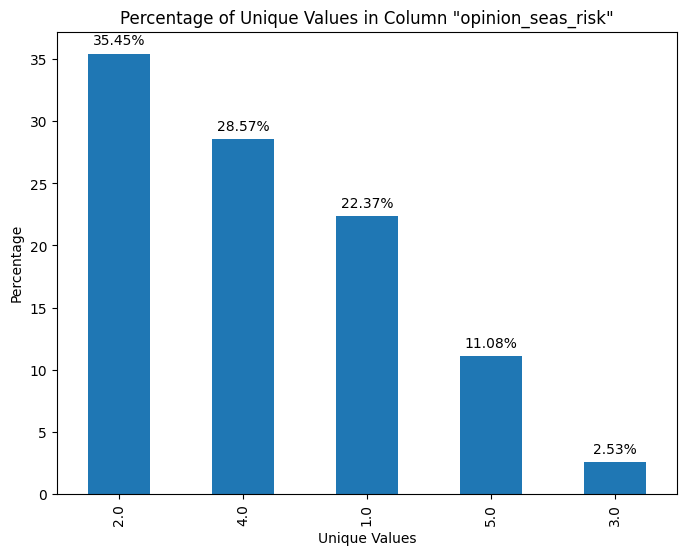

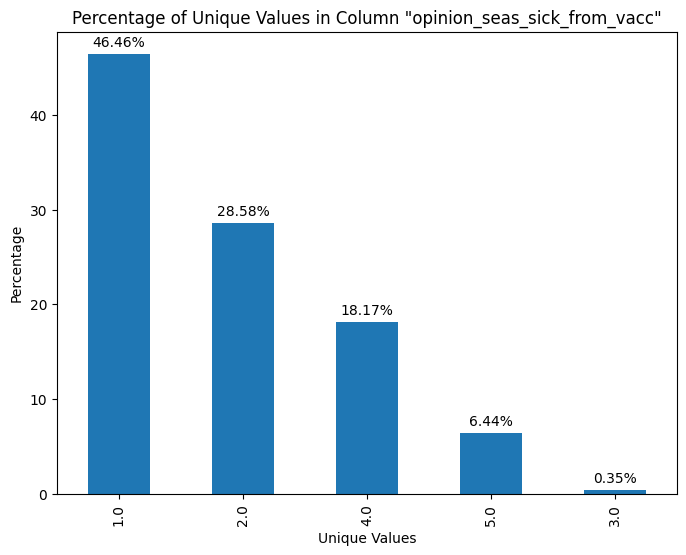

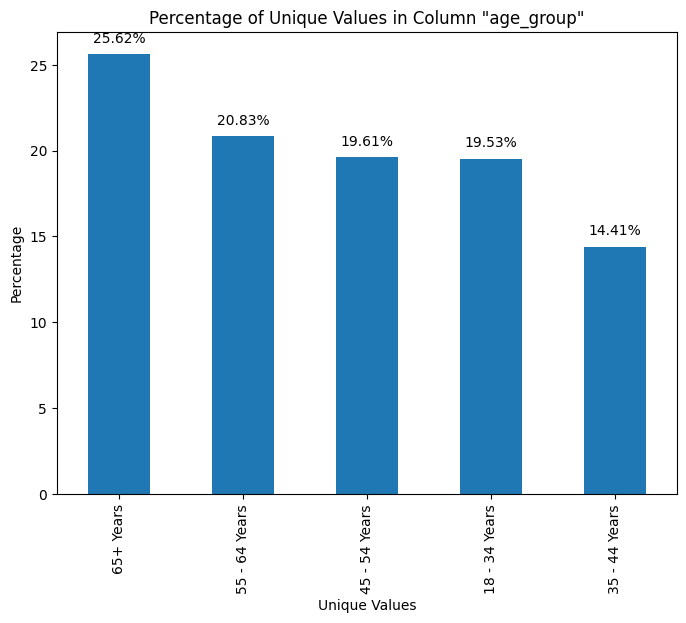

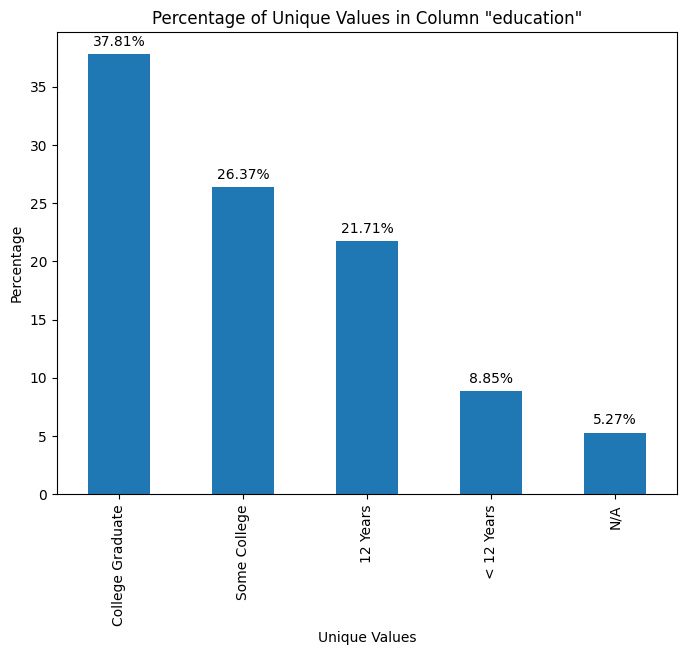

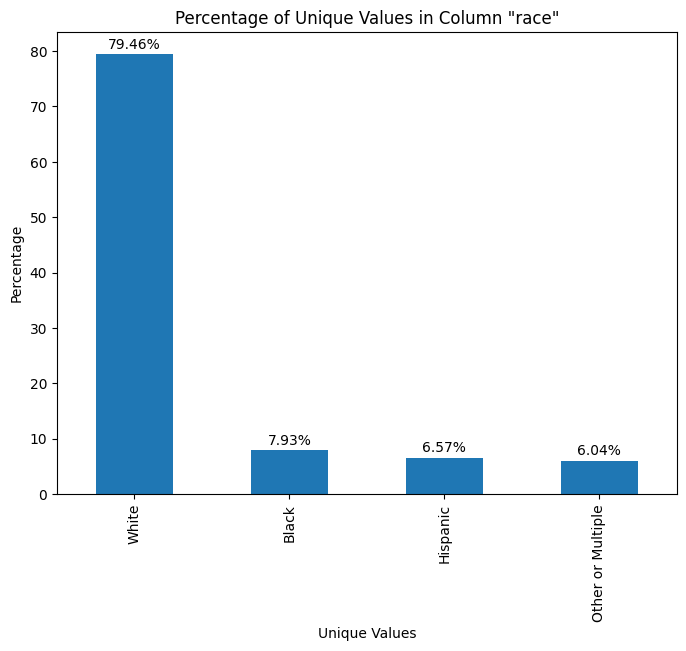

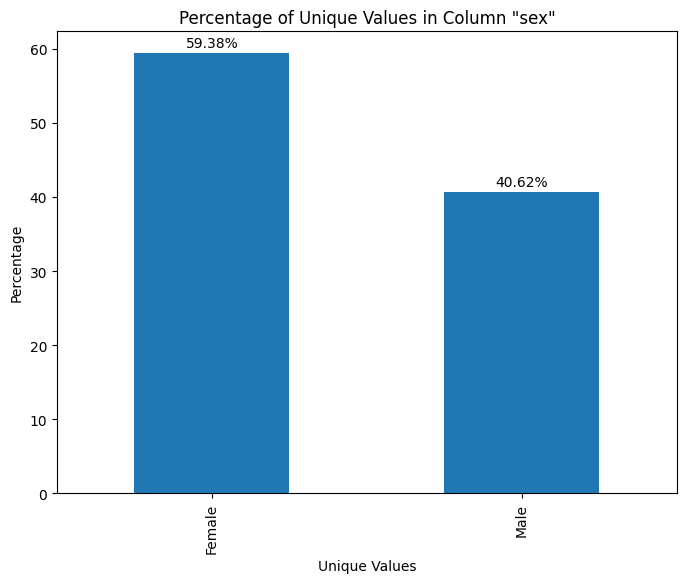

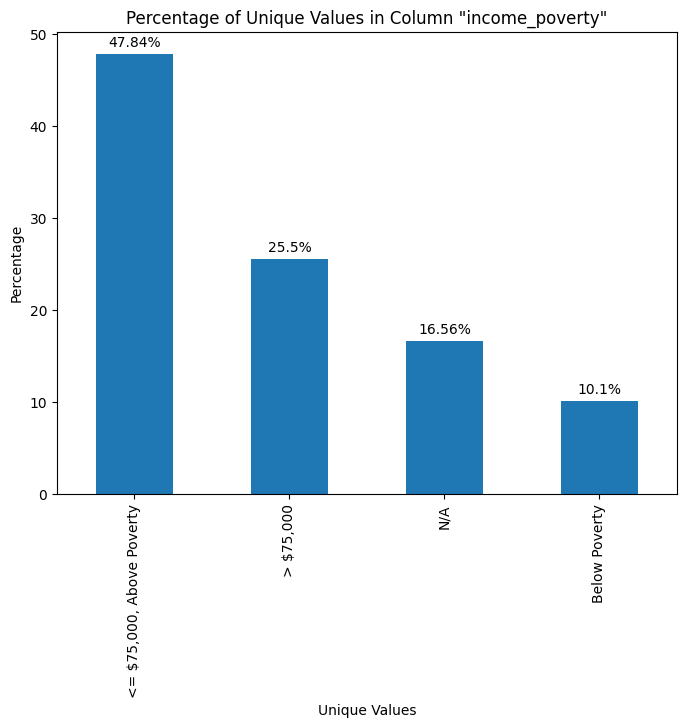

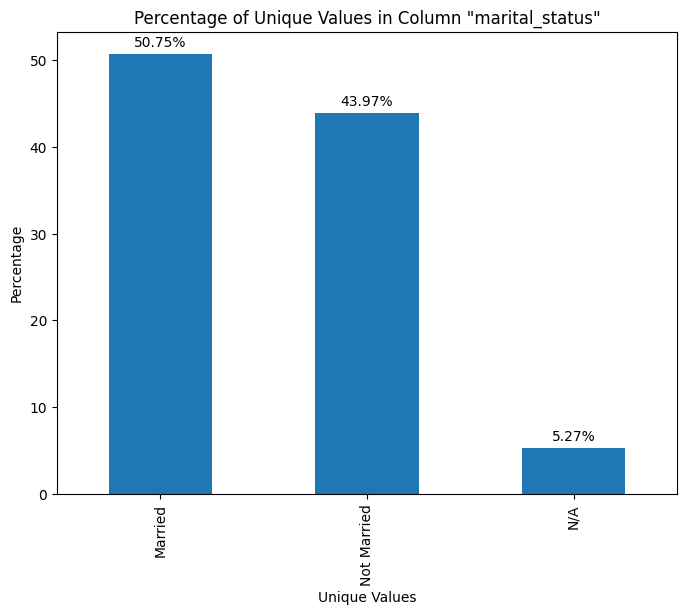

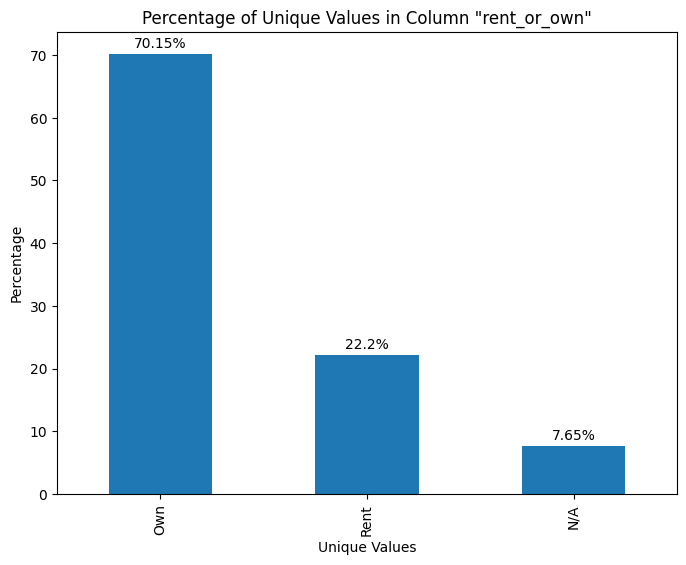

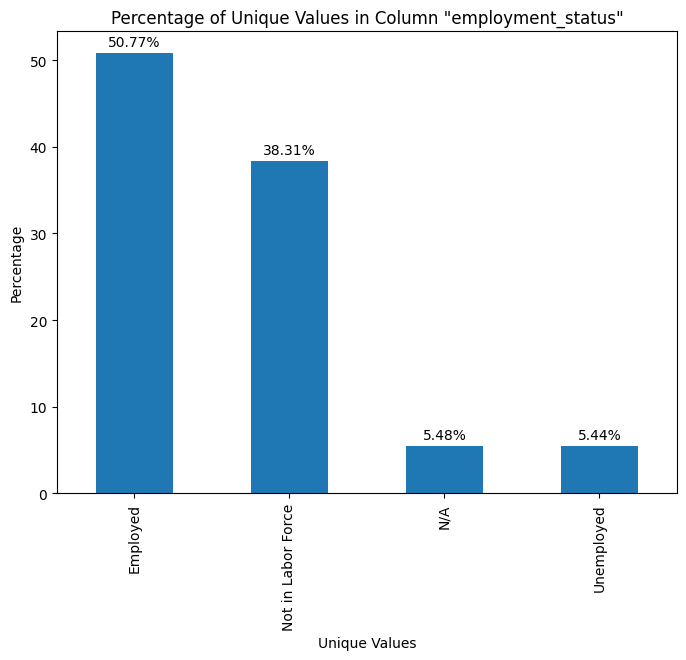

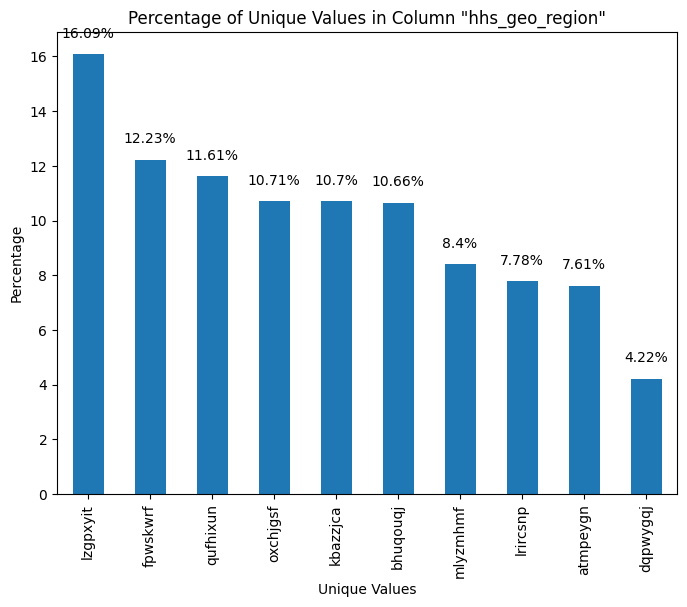

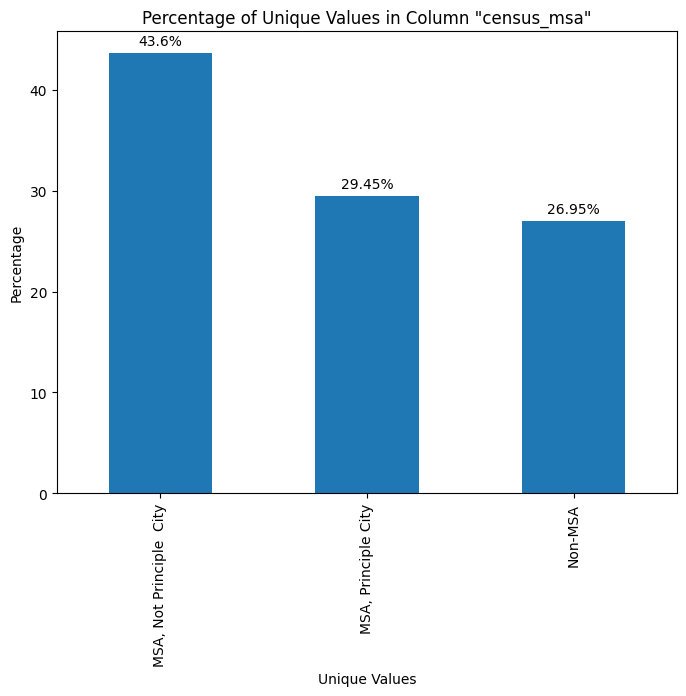

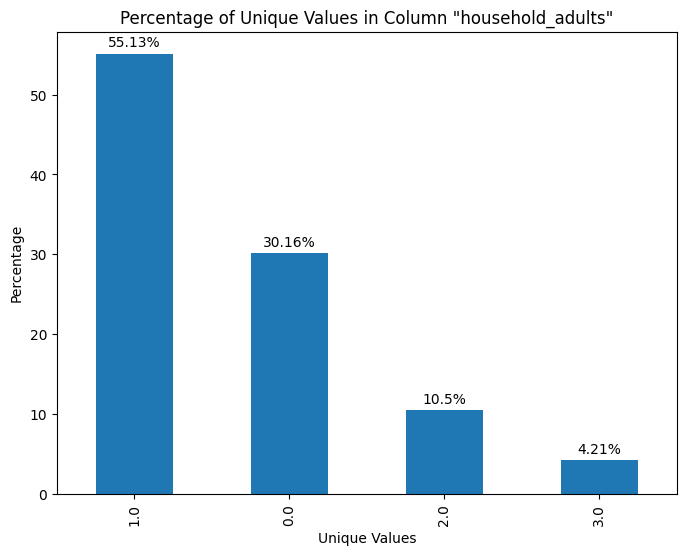

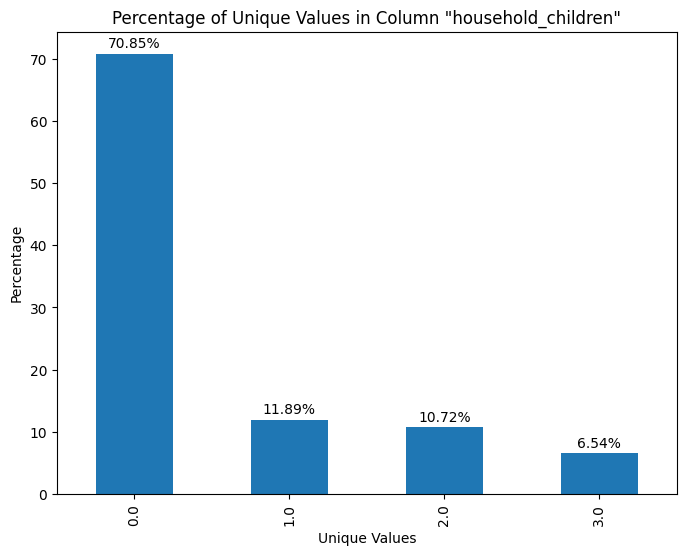

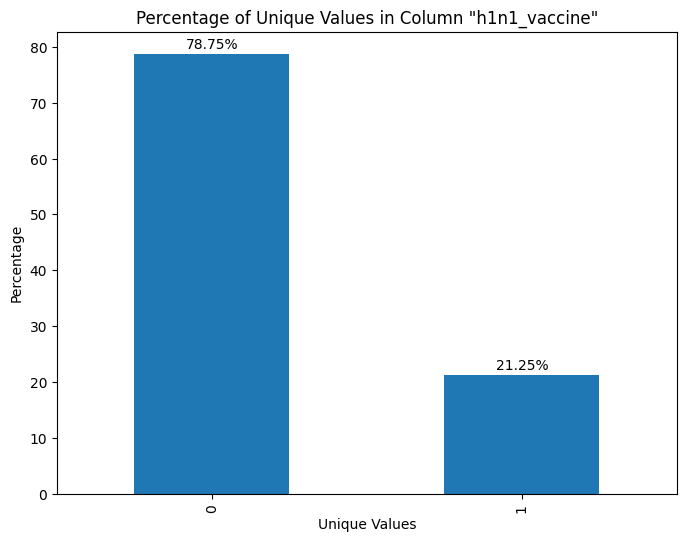

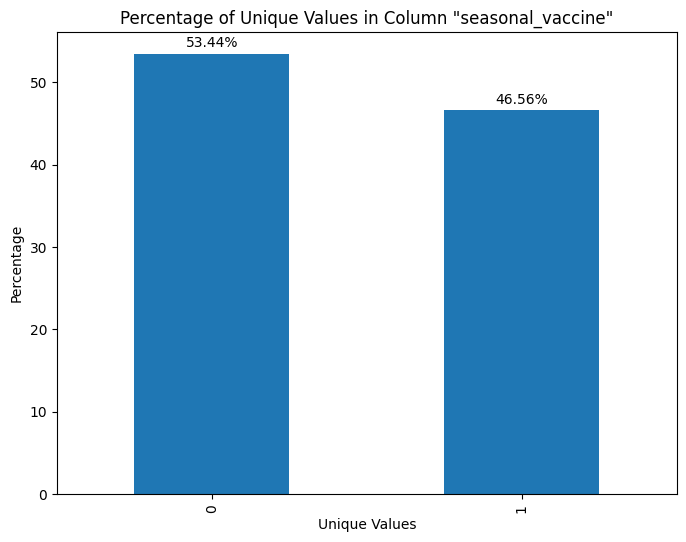

In [21]:
# Function to plot percentage of each unique value in each column
def plot_percentage_of_unique_values(df):
    for column in df.columns:
        value_counts = df[column].value_counts(normalize=True) * 100
        ax = value_counts.plot(kind='bar', figsize=(8, 6))
        plt.title(f'Percentage of Unique Values in Column "{column}"')
        plt.xlabel('Unique Values')
        plt.ylabel('Percentage')
        for i in ax.patches:
            ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5,
                    f'{round(i.get_height(), 2)}%',
                    ha='center', va='bottom')
        plt.show()

# Plotting
plot_percentage_of_unique_values(data)

### Insights:

1. Nearly 40% of surveyed individuals expressed "somewhat concerned" feelings about the H1N1 virus and its associated risks.
2. A majority (55%) of respondents have only a limited knowledge about H1N1 flu.
3. Over 95% of participants reported not taking antiviral medicines.
4. Approximately 73% of individuals do not avoid close contact with those exhibiting flu-like symptoms.
5. A vast majority (93%) of respondents have not purchased a face mask.
6. Around 83% of people do not practice frequent handwashing or use hand sanitizer.
7. Roughly 64% of participants have not reduced their time spent at large gatherings.
8. About 66% of individuals have not decreased contact with people outside their household.
9. Approximately 68% of respondents have not avoided touching their eyes, nose, or mouth.
10. Nearly 80% of individuals did not receive the H1N1 vaccine recommended by their doctor.
11. Around 70% of people did not receive the seasonal flu vaccine recommended by a doctor.
12. Only 27% of respondents have one or more chronic medical conditions.
13. A significant majority (over 91%) of people surveyed did not have close contact with children under 6 months of age.
14. Only 11% of individuals surveyed were health workers.
15. About 45% of respondents consider the H1N1 vaccine somewhat effective, while approximately 27% believe it to be very effective.
16. Views on the risk of getting sick with H1N1 flu without a vaccine vary: 30% consider it very low, 39% somewhat low, 4% are unsure, 20% somewhat high, and 7% very high.
17. Concerns about getting sick from taking the H1N1 vaccine vary: 34% are not at all worried, 36% not very worried, 1% are unsure, 22% are somewhat worried, and 8% are very worried.
18. Views on the effectiveness of the seasonal flu vaccine: 45% somewhat effective, 37% very effective, 4% not at all effective, 8% not very effective, and 5% are unsure.
19. Perceptions of the risk of getting sick with seasonal flu without a vaccine: 22% very low, 35% somewhat low, 3% unsure, 29% somewhat high, and 11% very high.
20. Concerns about getting sick from taking the seasonal flu vaccine: 46% not at all worried, 29% not very worried, 0.4% are unsure, 18% are somewhat worried, and 6% are very worried.
21. The age distribution of respondents: 26% are 65+ years old, 21% are 55-64 years old, 19% are 45-54 years old, 20% are 18-34 years old, and 14% are 35-44 years old.
22. Education levels among respondents: 38% are college graduates, 26% have some college education, 22% have completed 12 years of schooling, and 9% have less than 12 years of education.
23. Racial demographics: 79% are white, 8% are black, 7% are Hispanic, and 6% are of other or multiple races.
24. Gender distribution: 59% are female, and 41% are male.
25. Income distribution: 10% are below the poverty line, 26% have an annual household income above $75,000, and 48% have an annual household income below $75,000 but above the poverty line.
26. Marital status: 51% are married.
27. Homeownership: 70% of respondents own their own homes.
28. Employment status: 51% are employed, 38% are not in the labor force, and 5% are unemployed.
29. Geographic distribution: 16% live in region 'lzgpxyit', 12% live in 'fpwskwrf', and 12% live in 'qufhixun'.
30. Residence within metropolitan statistical areas (MSA): 44% live in MSA, not principal city; 29% live in MSA, principal city; and 27% live in non-MSA areas.
31. Number of other adults in the household: 33% have one other adult, 30% have no other adults, 11% have two other adults, and 4% have three or more other adults.
32. Number of children in the household: 71% have no children, 12% have one child, 11% have two children, and 7% have three or more children.






## Bivariate analysis

Text(0.5, 1.0, 'H1N1 Vaccination Percentage by Doctor Recommendation')

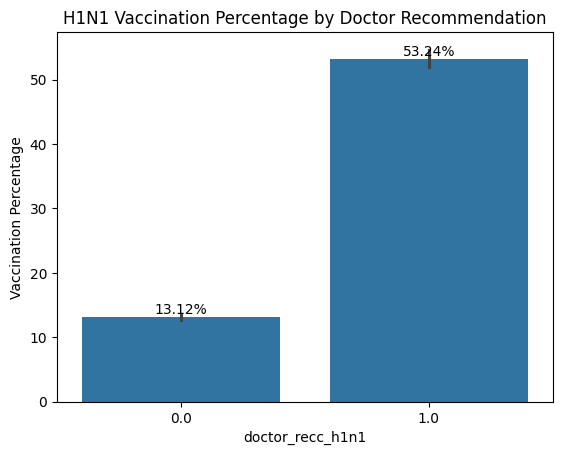

In [22]:
# Graph for relationship between H1N1 vaccination and Doctor recommendation
ax = sns.barplot(x=data['doctor_recc_h1n1'], y=data['h1n1_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('H1N1 Vaccination Percentage by Doctor Recommendation')

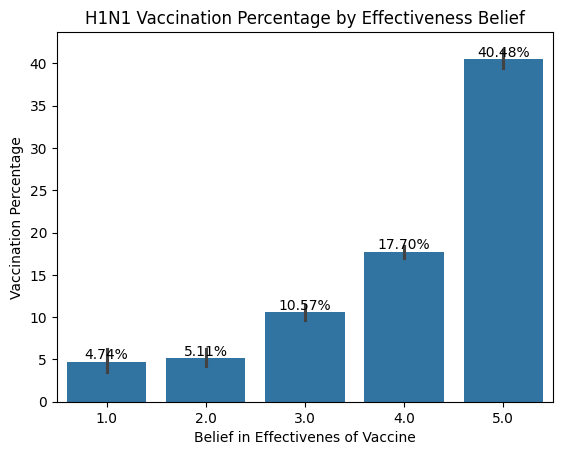

In [23]:
# Graph for vaccine percentage differrentiation depending on opinion of effectiveness of H1N1 Vaccine
ax = sns.barplot(x=data['opinion_h1n1_vacc_effective'], y=data['h1n1_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('Belief in Effectivenes of Vaccine')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('H1N1 Vaccination Percentage by Effectiveness Belief');

Text(0.5, 1.0, 'H1N1 Vaccination Percentage by risk perception of H1N1')

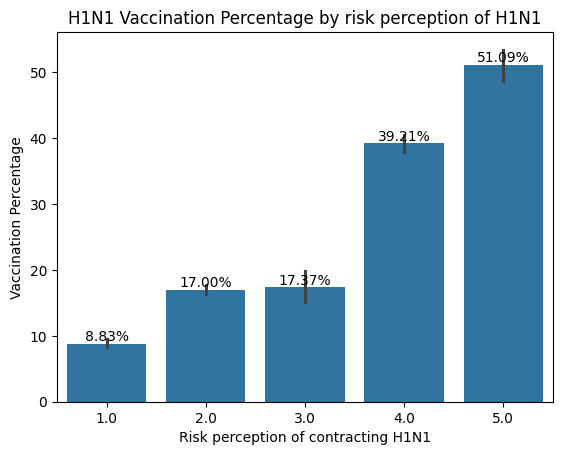

In [24]:
# Risk graph exploring vaccine percentage depending on risk perception of H1N1
ax = sns.barplot(x=data['opinion_h1n1_risk'], y=data['h1n1_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('Risk perception of contracting H1N1')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('H1N1 Vaccination Percentage by risk perception of H1N1')

Text(0.5, 1.0, 'Seasonal Flu Vaccination Percentage by Doctor Recommendation')

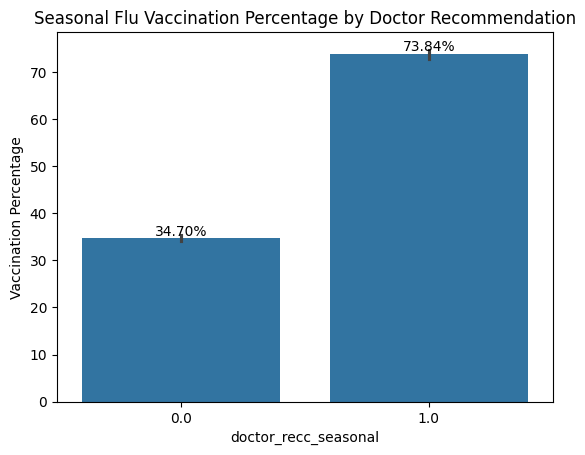

In [25]:
# Graph for relationship between Seasonal flu vaccination and Doctor recommendation
ax = sns.barplot(x=data['doctor_recc_seasonal'], y=data['seasonal_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('Seasonal Flu Vaccination Percentage by Doctor Recommendation')

Text(0.5, 1.0, 'Seasonal Vaccination Percentage by Effectiveness Belief')

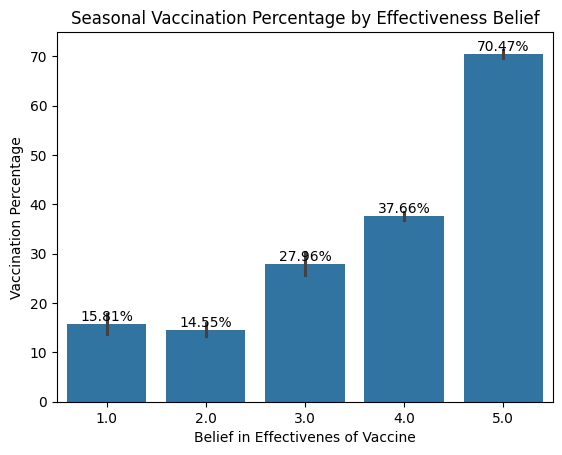

In [26]:
# Graph for vaccine percentage differrentiation depending on opinion of effectiveness of H1N1 Vaccine
ax = sns.barplot(x=data['opinion_seas_vacc_effective'], y=data['seasonal_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('Belief in Effectivenes of Vaccine')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('Seasonal Vaccination Percentage by Effectiveness Belief')

Text(0.5, 1.0, 'Seasonal flu Vaccination Percentage by risk perception of Seasonal Flu')

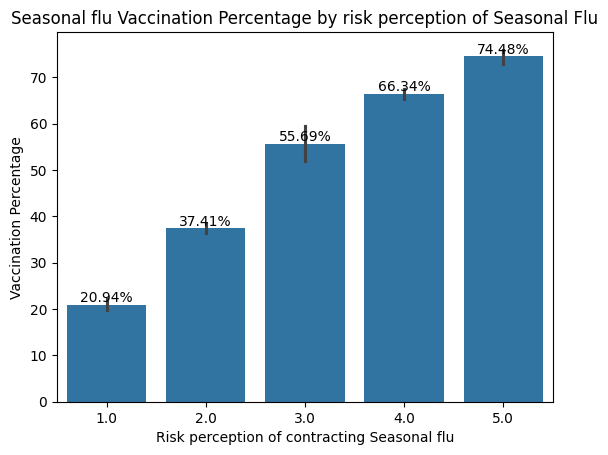

In [27]:
# Risk graph exploring vaccine percentage depending on risk perception of Seasonal flu
ax = sns.barplot(x=data['opinion_seas_risk'], y=data['seasonal_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('Risk perception of contracting Seasonal flu')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('Seasonal flu Vaccination Percentage by risk perception of Seasonal Flu')

[Text(0, 0, 'oxchjgsf'),
 Text(1, 0, 'bhuqouqj'),
 Text(2, 0, 'qufhixun'),
 Text(3, 0, 'lrircsnp'),
 Text(4, 0, 'atmpeygn'),
 Text(5, 0, 'lzgpxyit'),
 Text(6, 0, 'fpwskwrf'),
 Text(7, 0, 'mlyzmhmf'),
 Text(8, 0, 'dqpwygqj'),
 Text(9, 0, 'kbazzjca')]

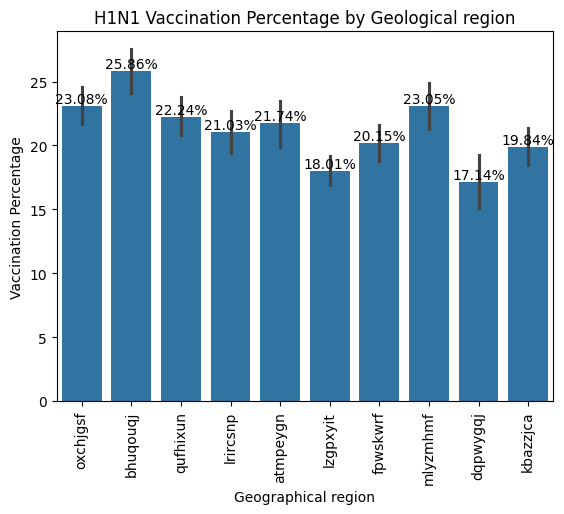

In [28]:
# graph exploring h1n1 vaccine percentage depending on respondant geological region
ax = sns.barplot(x=data['hhs_geo_region'], y=data['h1n1_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('Geographical region')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('H1N1 Vaccination Percentage by Geological region')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'oxchjgsf'),
 Text(1, 0, 'bhuqouqj'),
 Text(2, 0, 'qufhixun'),
 Text(3, 0, 'lrircsnp'),
 Text(4, 0, 'atmpeygn'),
 Text(5, 0, 'lzgpxyit'),
 Text(6, 0, 'fpwskwrf'),
 Text(7, 0, 'mlyzmhmf'),
 Text(8, 0, 'dqpwygqj'),
 Text(9, 0, 'kbazzjca')]

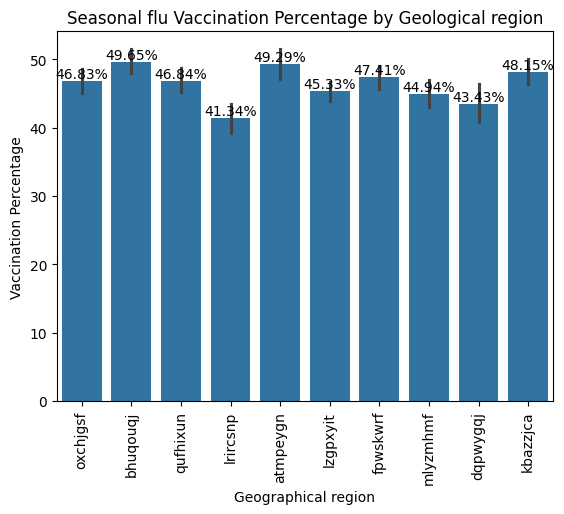

In [29]:
# graph exploring seasonal vaccine percentage depending on respondant geological region
ax = sns.barplot(x=data['hhs_geo_region'], y=data['seasonal_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('Geographical region')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('Seasonal flu Vaccination Percentage by Geological region')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Not in Labor Force'),
 Text(1, 0, 'Employed'),
 Text(2, 0, 'Unemployed'),
 Text(3, 0, 'N/A')]

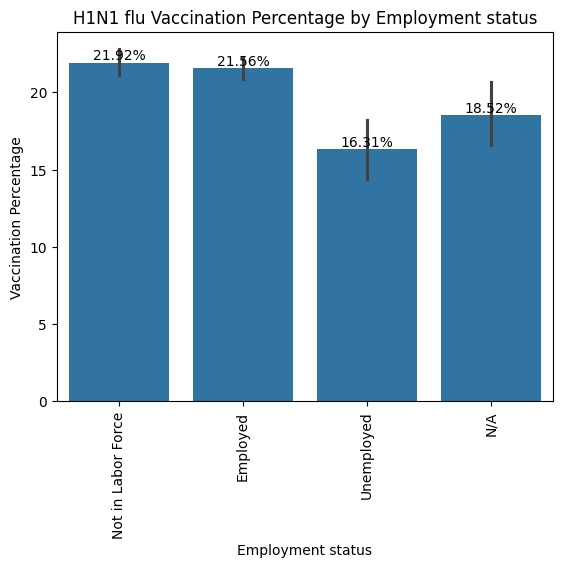

In [30]:
# graph exploring H1N1 vaccine percentage depending on respondant emp[loyment status]
ax = sns.barplot(x=data['employment_status'], y=data['h1n1_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('Employment status')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('H1N1 flu Vaccination Percentage by Employment status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Not in Labor Force'),
 Text(1, 0, 'Employed'),
 Text(2, 0, 'Unemployed'),
 Text(3, 0, 'N/A')]

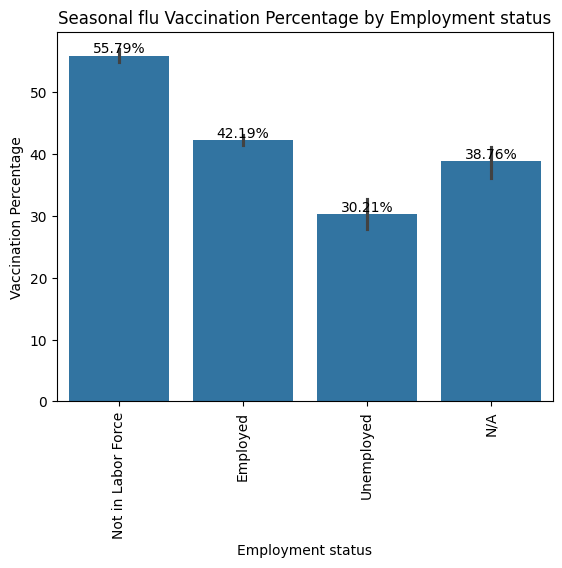

In [31]:
# graph exploring seasonal vaccine percentage depending on respondant emp[loyment status]
ax = sns.barplot(x=data['employment_status'], y=data['seasonal_vaccine']*100)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('Employment status')
ax.set_ylabel('Vaccination Percentage')
ax.set_title('Seasonal flu Vaccination Percentage by Employment status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

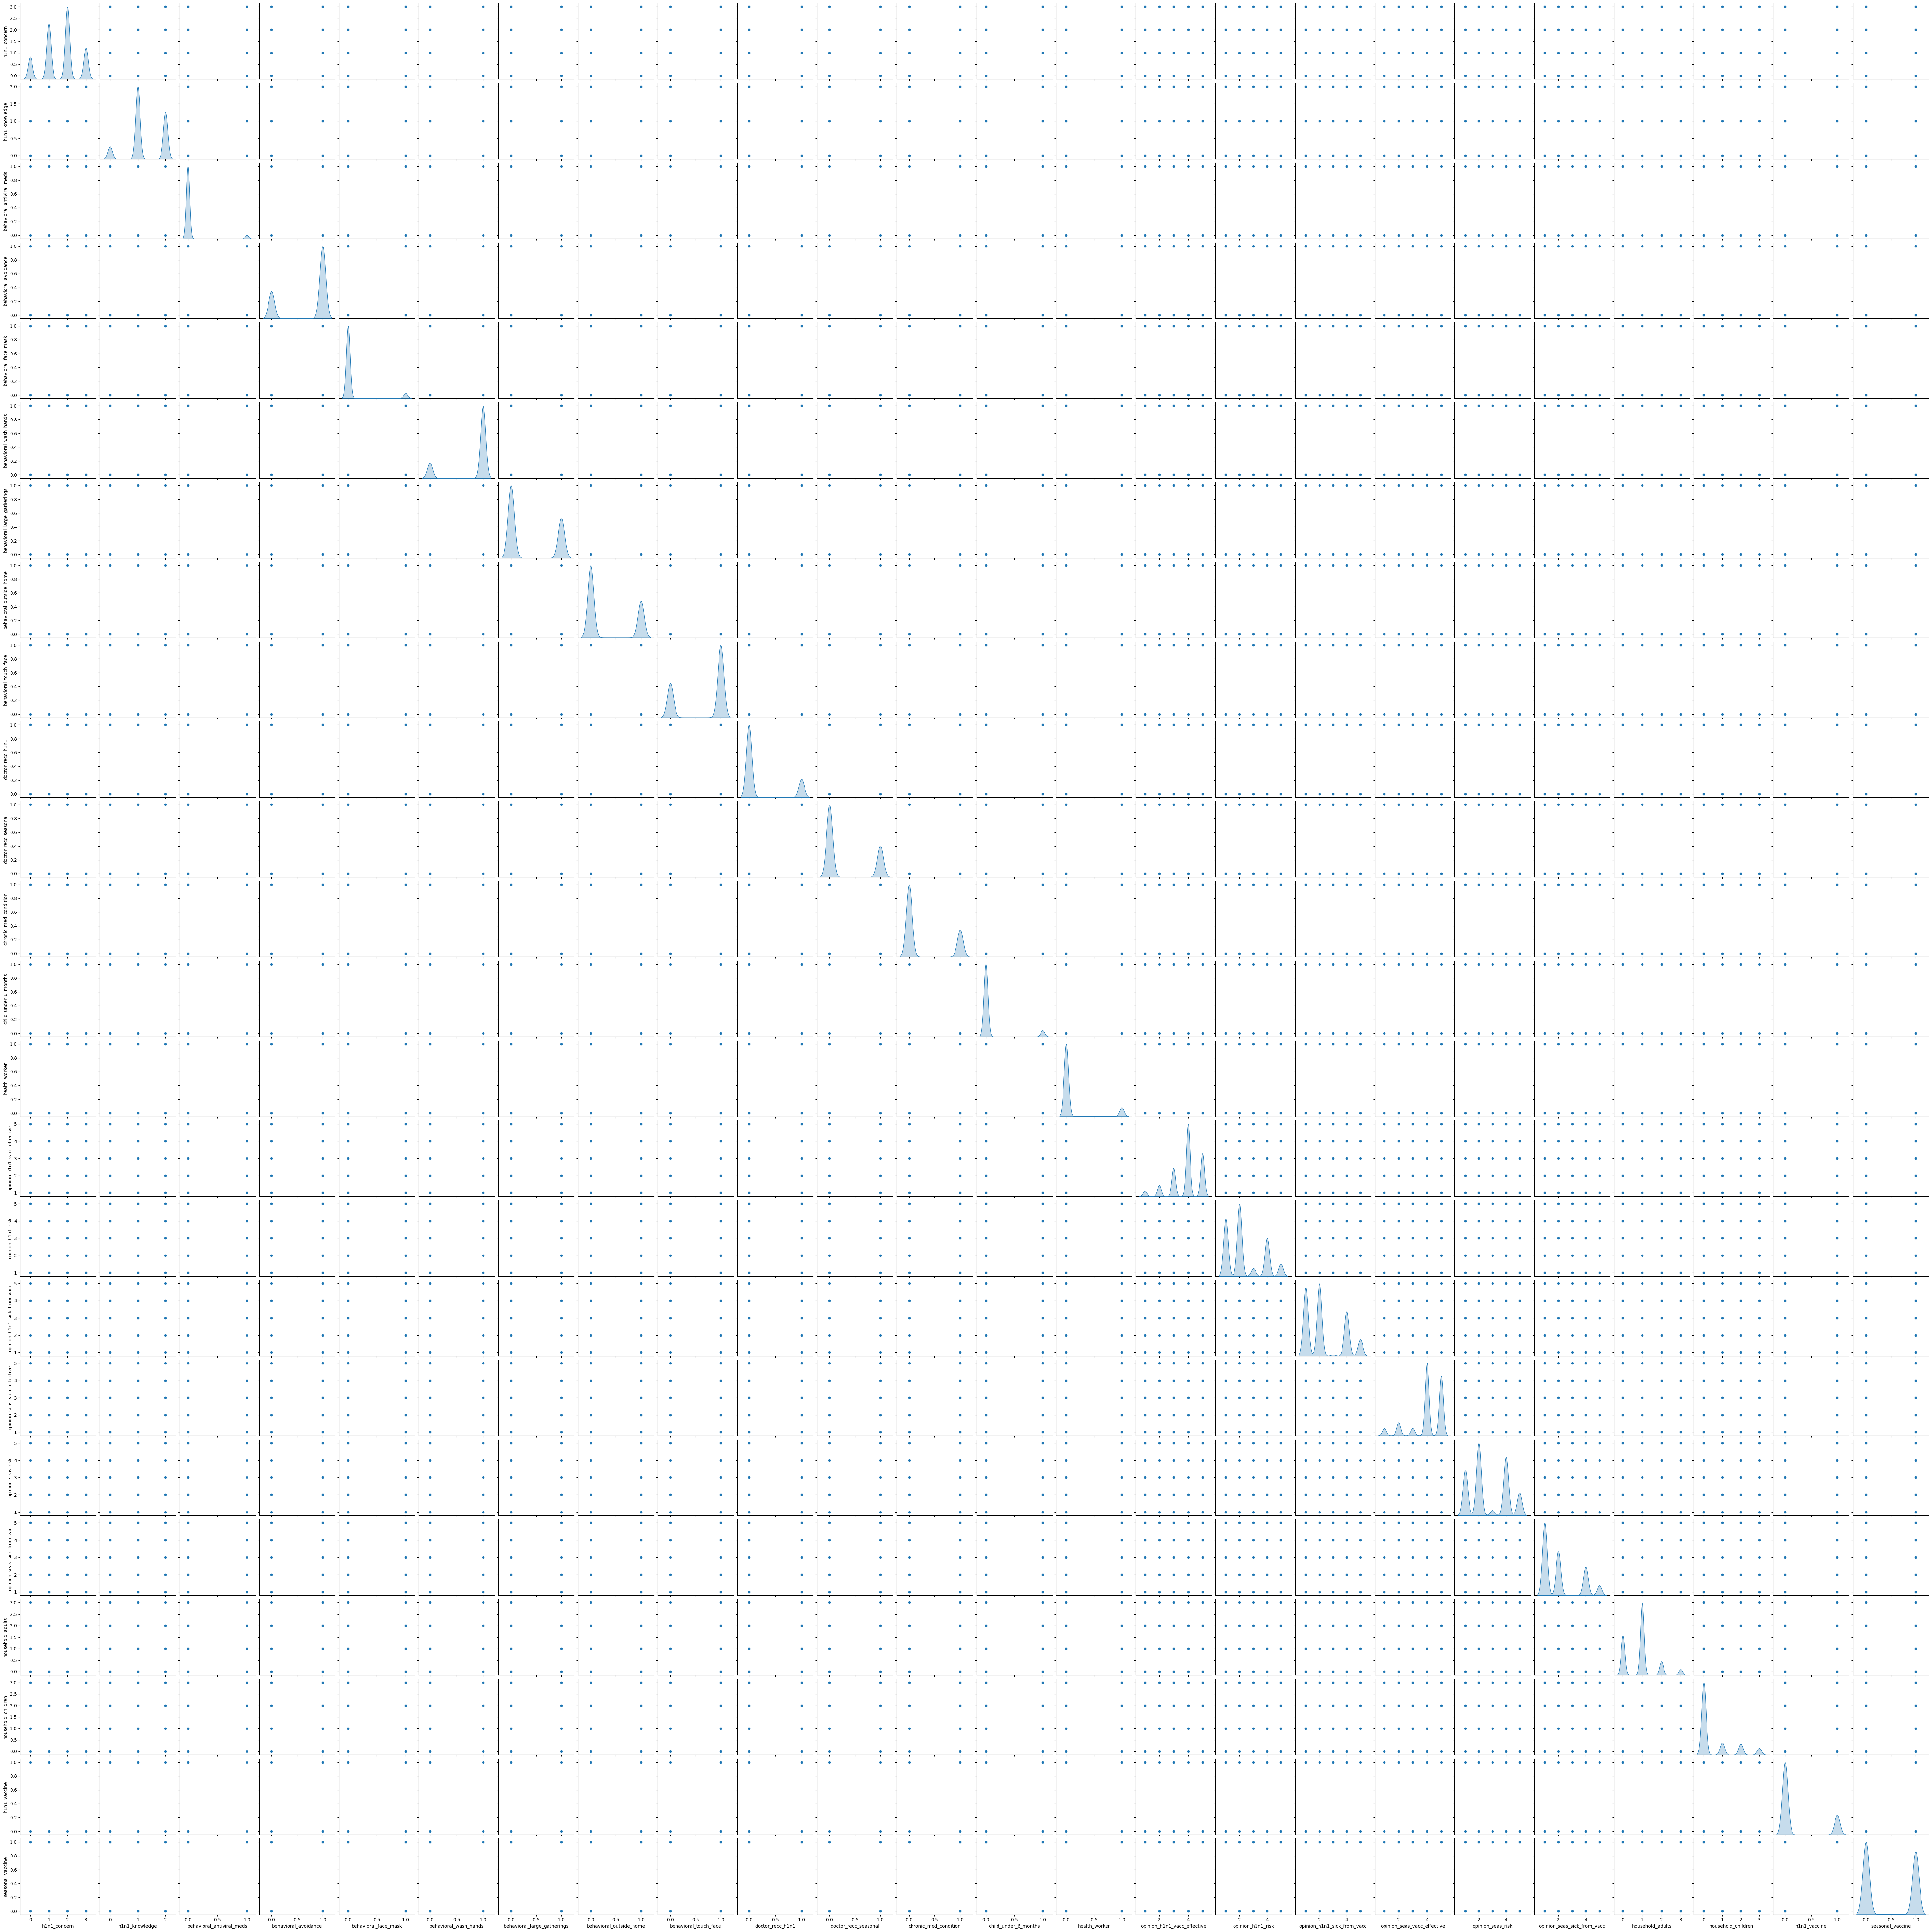

In [32]:
sns.pairplot(data,diag_kind='kde')

In [33]:
#displaying correlation matrix of the dataframe
corrmat=data.corr(numeric_only=True)
corrmat.style.background_gradient(cmap='coolwarm')

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
h1n1_concern,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,0.136957,0.120670,0.092249,0.048400,0.032734,0.235841,0.372716,0.355637,0.231649,0.327986,0.220568,-0.016079,0.049441,0.121574,0.154488
h1n1_knowledge,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,0.094135,0.074376,-0.011653,0.025971,0.171516,0.119010,0.074394,-0.017038,0.085281,0.081156,-0.050857,0.023866,0.053378,0.117771,0.119779
behavioral_antiviral_meds,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.050882,0.031682,0.004637,0.026183,0.007145,0.030172,0.102553,0.076930,0.014498,0.081503,0.078618,0.044829,0.083090,0.040226,0.006013
behavioral_avoidance,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.065589,0.070761,0.042054,0.000952,0.002232,0.109066,0.116259,0.129983,0.117356,0.127991,0.084346,0.017995,0.038977,0.046837,0.076130
behavioral_face_mask,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.079887,0.065301,0.062200,0.036828,0.065645,0.037679,0.128316,0.104655,0.040889,0.105917,0.084084,0.014191,0.004794,0.070413,0.050020
behavioral_wash_hands,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.086392,0.099317,0.030205,0.035749,0.052930,0.134815,0.167414,0.148739,0.136936,0.170655,0.087218,0.009367,0.047451,0.074570,0.112254
behavioral_large_gatherings,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.077143,0.087315,0.099621,0.020074,-0.032226,0.052432,0.125076,0.183517,0.078208,0.130800,0.131414,-0.030994,-0.009126,0.018089,0.063722
behavioral_outside_home,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.067136,0.081252,0.093675,0.016657,-0.035128,0.050866,0.123348,0.171669,0.066861,0.117428,0.133080,-0.026542,-0.008937,0.022080,0.053287
behavioral_touch_face,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.087201,0.099753,0.029966,0.026506,0.066284,0.101776,0.144442,0.130461,0.104530,0.141537,0.089156,-0.001233,0.023739,0.070855,0.119925
doctor_recc_h1n1,0.136957,0.094135,0.050882,0.065589,0.079887,0.086392,0.077143,0.067136,0.087201,1.000000,0.603152,0.152020,0.078306,0.098237,0.150546,0.247630,0.106671,0.103365,0.193956,0.057559,0.009081,0.029398,0.394086,0.198560


In [34]:
# displaying the list of correlations between the columns in the dataset in descending order
ut=corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))
corr_pairs=ut.stack()
corr_pairs=corr_pairs[abs(corr_pairs)<1]
sorted_corr=corr_pairs.abs().sort_values(ascending=False)

print(sorted_corr)

doctor_recc_h1n1             doctor_recc_seasonal           0.603152
behavioral_large_gatherings  behavioral_outside_home        0.580881
opinion_h1n1_risk            opinion_seas_risk              0.562976
opinion_h1n1_sick_from_vacc  opinion_seas_sick_from_vacc    0.490243
opinion_h1n1_vacc_effective  opinion_seas_vacc_effective    0.469367
                                                              ...   
chronic_med_condition        child_under_6_months           0.003533
household_children           h1n1_vaccine                   0.002567
behavioral_avoidance         health_worker                  0.002232
behavioral_touch_face        household_adults               0.001233
behavioral_avoidance         child_under_6_months           0.000952
Length: 276, dtype: float64


### Insights

1. Among respondents recommended by a doctor to have the H1N1 vaccine, 53% actually received the vaccination.

2. A positive correlation exists between individuals' belief in the effectiveness of the H1N1 vaccination and the percentage of those vaccinated against H1N1.

3. Similarly, individuals with a higher perception of risk associated with H1N1 had a higher percentage of vaccination against the virus.

4. Out of the respondents advised by a doctor to receive the seasonal flu vaccination, 74.5% actually got vaccinated.

5. There is a positive association between individuals' belief in the effectiveness of the seasonal flu vaccination and the percentage of vaccination against seasonal flu.

6. Likewise, individuals with a higher perception of risk associated with seasonal flu had a higher percentage of vaccination against it.

7. Geographic location doesn't seem to significantly influence the percentage of seasonal or H1N1 vaccinations.

8. While the respondent's employment status doesn't notably impact the H1N1 vaccination percentage, it exhibits a stronger effect on seasonal flu vaccination.

9. No significant correlation was found between any of the columns, indicating no immediate need for action based on the correlation analysis.

## Encoding input features

since all the columns in our dataset are categorical, no feature scaling is required

in this analysis, we will encode features using a mixture of techniques:
* One hot encoding : for columns containing nominal categorical information
* label encoding : for columns containing ordinal categorical information


In [35]:
# printing unique values in each column:
for i in data.columns:
    print(data[i].value_counts())
    print('-------------------')

h1n1_concern
2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
-------------------
h1n1_knowledge
1.0    14714
2.0     9487
0.0     2506
Name: count, dtype: int64
-------------------
behavioral_antiviral_meds
0.0    25406
1.0     1301
Name: count, dtype: int64
-------------------
behavioral_avoidance
1.0    19436
0.0     7271
Name: count, dtype: int64
-------------------
behavioral_face_mask
0.0    24866
1.0     1841
Name: count, dtype: int64
-------------------
behavioral_wash_hands
1.0    22057
0.0     4650
Name: count, dtype: int64
-------------------
behavioral_large_gatherings
0.0    17160
1.0     9547
Name: count, dtype: int64
-------------------
behavioral_outside_home
0.0    17726
1.0     8981
Name: count, dtype: int64
-------------------
behavioral_touch_face
1.0    18129
0.0     8578
Name: count, dtype: int64
-------------------
doctor_recc_h1n1
0.0    21299
1.0     5408
Name: count, dtype: int64
-------------------
doctor_recc_seasonal
0.0    1861

In [36]:
# Printing unique values and number of unique values for each column
for col in data.columns:
    unique_values = data[col].unique()
    num_unique_values = len(unique_values)
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {num_unique_values}")
    print("----------------------")

Column: h1n1_concern
Unique Values: [1. 3. 2. 0.]
Number of Unique Values: 4
----------------------
Column: h1n1_knowledge
Unique Values: [0. 2. 1.]
Number of Unique Values: 3
----------------------
Column: behavioral_antiviral_meds
Unique Values: [0. 1.]
Number of Unique Values: 2
----------------------
Column: behavioral_avoidance
Unique Values: [0. 1.]
Number of Unique Values: 2
----------------------
Column: behavioral_face_mask
Unique Values: [0. 1.]
Number of Unique Values: 2
----------------------
Column: behavioral_wash_hands
Unique Values: [0. 1.]
Number of Unique Values: 2
----------------------
Column: behavioral_large_gatherings
Unique Values: [0. 1.]
Number of Unique Values: 2
----------------------
Column: behavioral_outside_home
Unique Values: [1. 0.]
Number of Unique Values: 2
----------------------
Column: behavioral_touch_face
Unique Values: [1. 0.]
Number of Unique Values: 2
----------------------
Column: doctor_recc_h1n1
Unique Values: [0. 1.]
Number of Unique Value

we can see that the following columns contain nominal values:
* age_group
* race
* sex
* marital_Status
* rent_or_own
* hhs_geo region

and these columns contain ordinal values:
* education
* income_poverty
* employment_status
* census_msa
    

In [37]:
# estabilishing nominal and ordinal columns
nom_col = ['age_group','race','sex','marital_status','rent_or_own','hhs_geo_region']
ord_col = ['education','income_poverty','employment_status','census_msa']

# initinalising the label encoder object
le=LabelEncoder()

# applying the label encoder object
for i in ord_col:
    data[i] = le.fit_transform(data[i])
    
# One-Hot Encoding nominal columns
data = pd.get_dummies(data, columns=nom_col, drop_first=True)

#converting datatype of the dataframe to integer (to convert new one hot encoded columns containing boolean values)
data=data.astype(int)



In [38]:
# displaying a sample of dataframe after encoding
data.sample(5)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,income_poverty,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_N/A,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun
14183,1,1,0,0,0,1,0,0,0,1,0,1,0,0,4,2,1,2,2,2,4,0,2,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0
24874,1,1,0,1,0,1,0,0,0,0,0,0,0,0,4,1,4,4,2,2,4,0,0,0,1,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
26073,3,2,1,1,1,1,1,1,1,0,1,1,0,0,3,5,4,4,5,1,4,2,2,2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
18118,1,2,0,1,0,1,0,0,0,0,0,0,0,0,4,2,4,4,2,2,4,1,0,2,1,2,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1
971,3,2,0,1,0,1,0,0,1,1,1,1,0,0,4,4,5,5,5,5,2,1,0,2,1,2,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [39]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'education',
       'income_poverty', 'employment_status', 'census_msa', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine',
       'age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_N/A', 'marital_status_Not Married', 'rent_or_own_Own',
       'rent_or_own

In [40]:
# splitting the dataset into input and target variables
x = data.drop(columns=['h1n1_vaccine','seasonal_vaccine'])
y = data[['h1n1_vaccine', 'seasonal_vaccine']]

In [41]:
# splitting the data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=13)

## ML analysis

Predicting whether an individual had the H1N1 and seasonal flu vaccines or not falls under multilabel classification because an individual can either have received both vaccines, only one of them, or none at all.


Common algorithms used for multilabel classification include:

* Binary Relevance: Treat each label as a separate binary classification problem.
* Label Powerset: Treat each unique combination of labels as a single class.
* Classifier Chains: Create a chain of binary classifiers, where each classifier is trained to predict one label based on the input features and the predictions of previous classifiers in the chain.

### Binary Relevance

we are going to use binary relevance method with a variety of algorithms

In [42]:

# Define the Binary Relevance classifier for each algorithm
br_lr = BinaryRelevance(LogisticRegression())
br_svm = BinaryRelevance(SVC())
br_dt = BinaryRelevance(DecisionTreeClassifier())
br_rf = BinaryRelevance(RandomForestClassifier())
br_knn = BinaryRelevance(KNeighborsClassifier())

# Train the Binary Relevance classifiers
br_lr.fit(x_train, y_train)
br_svm.fit(x_train, y_train)
br_dt.fit(x_train, y_train)
br_rf.fit(x_train, y_train)
br_knn.fit(x_train, y_train)

# Make predictions
br_lr_preds = br_lr.predict(x_test)
br_svm_preds = br_svm.predict(x_test)
br_dt_preds = br_dt.predict(x_test)
br_rf_preds = br_rf.predict(x_test)
br_knn_preds = br_knn.predict(x_test)

# Evaluation
print("Binary Relevance with Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, br_lr_preds))
print("Hamming Loss:", hamming_loss(y_test, br_lr_preds))
print("Jaccard Score:", jaccard_score(y_test, br_lr_preds, average='samples'))
print("F1 Score:", f1_score(y_test, br_lr_preds, average='samples'))
print("Precision:", precision_score(y_test, br_lr_preds, average='samples'))
print("Recall:", recall_score(y_test, br_lr_preds, average='samples'))
print()

print("Binary Relevance with SVM:")
print("Accuracy:", accuracy_score(y_test, br_svm_preds))
print("Hamming Loss:", hamming_loss(y_test, br_svm_preds))
print("Jaccard Score:", jaccard_score(y_test, br_svm_preds, average='samples'))
print("F1 Score:", f1_score(y_test, br_svm_preds, average='samples'))
print("Precision:", precision_score(y_test, br_svm_preds, average='samples'))
print("Recall:", recall_score(y_test, br_svm_preds, average='samples'))
print()

print("Binary Relevance with Decision Tree:")
print("Accuracy:", accuracy_score(y_test, br_dt_preds))
print("Hamming Loss:", hamming_loss(y_test, br_dt_preds))
print("Jaccard Score:", jaccard_score(y_test, br_dt_preds, average='samples'))
print("F1 Score:", f1_score(y_test, br_dt_preds, average='samples'))
print("Precision:", precision_score(y_test, br_dt_preds, average='samples'))
print("Recall:", recall_score(y_test, br_dt_preds, average='samples'))
print()

print("Binary Relevance with Random Forest:")
print("Accuracy:", accuracy_score(y_test, br_rf_preds))
print("Hamming Loss:", hamming_loss(y_test, br_rf_preds))
print("Jaccard Score:", jaccard_score(y_test, br_rf_preds, average='samples'))
print("F1 Score:", f1_score(y_test, br_rf_preds, average='samples'))
print("Precision:", precision_score(y_test, br_rf_preds, average='samples'))
print("Recall:", recall_score(y_test, br_rf_preds, average='samples'))
print()

print("Binary Relevance with K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, br_knn_preds))
print("Hamming Loss:", hamming_loss(y_test, br_knn_preds))
print("Jaccard Score:", jaccard_score(y_test, br_knn_preds, average='samples'))
print("F1 Score:", f1_score(y_test, br_knn_preds, average='samples'))
print("Precision:", precision_score(y_test, br_knn_preds, average='samples'))
print("Recall:", recall_score(y_test, br_knn_preds, average='samples'))


Binary Relevance with Logistic Regression:
Accuracy: 0.6708102441216115
Hamming Loss: 0.1923768159353003
Jaccard Score: 0.31204133592930955
F1 Score: 0.32659377964155556
Precision: 0.34094653287404525
Recall: 0.326793470121312

Binary Relevance with SVM:
Accuracy: 0.6717088512805152
Hamming Loss: 0.19110378912685339
Jaccard Score: 0.31001946982177625
F1 Score: 0.3250961010433827
Precision: 0.3413958364534971
Recall: 0.3238729968548749

Binary Relevance with Decision Tree:
Accuracy: 0.5152014377714542
Hamming Loss: 0.28972592481653436
Jaccard Score: 0.27954171034895914
F1 Score: 0.3012830113324347
Precision: 0.31780739853227497
Recall: 0.3064999251160701

Binary Relevance with Random Forest:
Accuracy: 0.6712595477010633
Hamming Loss: 0.1926014677250262
Jaccard Score: 0.3104687734012281
F1 Score: 0.3252458689032
Precision: 0.34094653287404525
Recall: 0.3243223004343268

Binary Relevance with K-Nearest Neighbors:
Accuracy: 0.5951774749138835
Hamming Loss: 0.24022764714692227
Jaccard Score

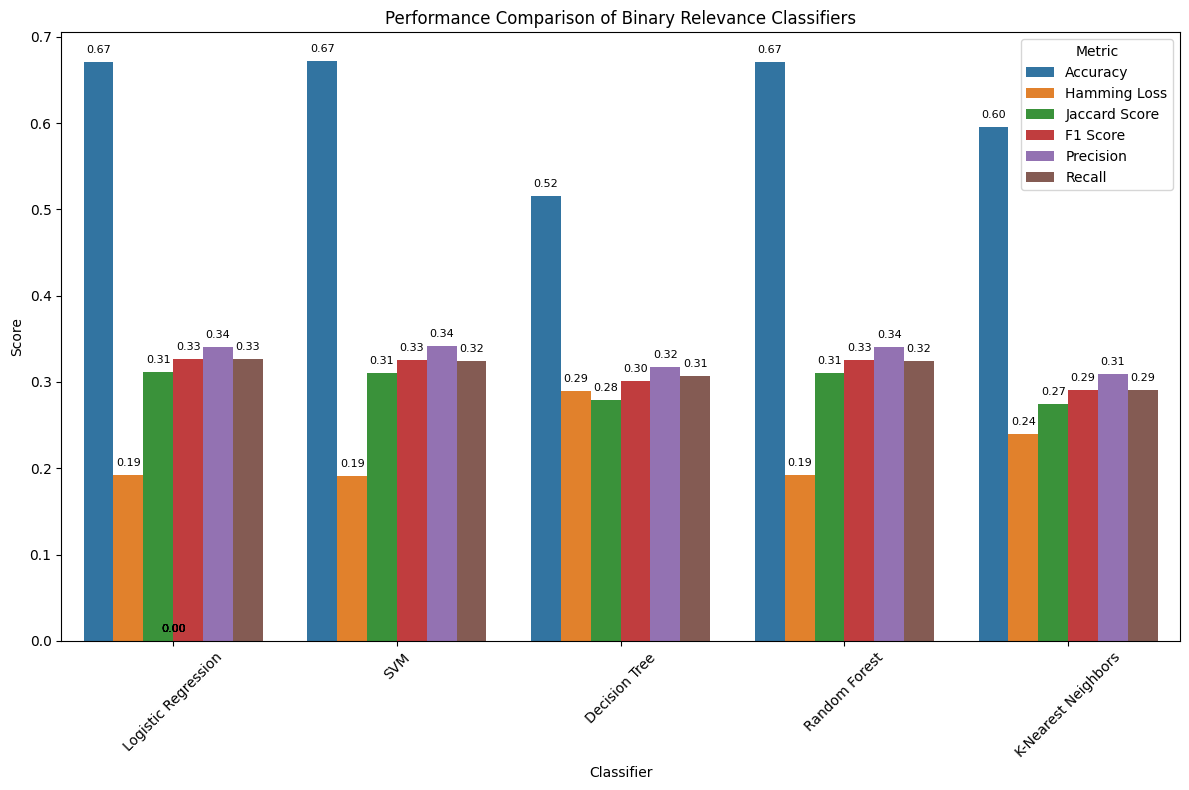

In [43]:
# Define the performance metrics
classifiers = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "K-Nearest Neighbors"]
accuracy_scores = [accuracy_score(y_test, br_lr_preds), accuracy_score(y_test, br_svm_preds),
                   accuracy_score(y_test, br_dt_preds), accuracy_score(y_test, br_rf_preds),
                   accuracy_score(y_test, br_knn_preds)]
hamming_losses = [hamming_loss(y_test, br_lr_preds), hamming_loss(y_test, br_svm_preds),
                  hamming_loss(y_test, br_dt_preds), hamming_loss(y_test, br_rf_preds),
                  hamming_loss(y_test, br_knn_preds)]
jaccard_scores = [jaccard_score(y_test, br_lr_preds, average='samples'), jaccard_score(y_test, br_svm_preds, average='samples'),
                  jaccard_score(y_test, br_dt_preds, average='samples'), jaccard_score(y_test, br_rf_preds, average='samples'),
                  jaccard_score(y_test, br_knn_preds, average='samples')]
f1_scores = [f1_score(y_test, br_lr_preds, average='samples'), f1_score(y_test, br_svm_preds, average='samples'),
             f1_score(y_test, br_dt_preds, average='samples'), f1_score(y_test, br_rf_preds, average='samples'),
             f1_score(y_test, br_knn_preds, average='samples')]
precision_scores = [precision_score(y_test, br_lr_preds, average='samples'), precision_score(y_test, br_svm_preds, average='samples'),
                    precision_score(y_test, br_dt_preds, average='samples'), precision_score(y_test, br_rf_preds, average='samples'),
                    precision_score(y_test, br_knn_preds, average='samples')]
recall_scores = [recall_score(y_test, br_lr_preds, average='samples'), recall_score(y_test, br_svm_preds, average='samples'),
                 recall_score(y_test, br_dt_preds, average='samples'), recall_score(y_test, br_rf_preds, average='samples'),
                 recall_score(y_test, br_knn_preds, average='samples')]

# Create a dataframe to hold the performance metrics
performance_df = pd.DataFrame({
    "Classifier": classifiers,
    "Accuracy": accuracy_scores,
    "Hamming Loss": hamming_losses,
    "Jaccard Score": jaccard_scores,
    "F1 Score": f1_scores,
    "Precision": precision_scores,
    "Recall": recall_scores
})

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot the performance metrics
sns.barplot(data=performance_df.melt(id_vars="Classifier", var_name="Metric", value_name="Score"), x="Classifier", y="Score", hue="Metric")
plt.title("Performance Comparison of Binary Relevance Classifiers")
plt.ylabel("Score")
plt.xlabel("Classifier")
plt.xticks(rotation=45)
plt.legend(title="Metric")

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()


### Label Powerset

In [44]:

# Define the Label Powerset classifier for each algorithm
lp_lr = LabelPowerset(LogisticRegression())
lp_svm = LabelPowerset(SVC())
lp_dt = LabelPowerset(DecisionTreeClassifier())
lp_rf = LabelPowerset(RandomForestClassifier())
lp_knn = LabelPowerset(KNeighborsClassifier())

# Train the Label Powerset classifiers
lp_lr.fit(x_train, y_train)
lp_svm.fit(x_train, y_train)
lp_dt.fit(x_train, y_train)
lp_rf.fit(x_train, y_train)
lp_knn.fit(x_train, y_train)

# Make predictions
lp_lr_preds = lp_lr.predict(x_test)
lp_svm_preds = lp_svm.predict(x_test)
lp_dt_preds = lp_dt.predict(x_test)
lp_rf_preds = lp_rf.predict(x_test)
lp_knn_preds = lp_knn.predict(x_test)

# Evaluation
print("Label Powerset with Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lp_lr_preds))
print("Hamming Loss:", hamming_loss(y_test, lp_lr_preds))
print("Jaccard Score:", jaccard_score(y_test, lp_lr_preds, average='samples'))
print("F1 Score:", f1_score(y_test, lp_lr_preds, average='samples'))
print("Precision:", precision_score(y_test, lp_lr_preds, average='samples'))
print("Recall:", recall_score(y_test, lp_lr_preds, average='samples'))
print()

print("Label Powerset with SVM:")
print("Accuracy:", accuracy_score(y_test, lp_svm_preds))
print("Hamming Loss:", hamming_loss(y_test, lp_svm_preds))
print("Jaccard Score:", jaccard_score(y_test, lp_svm_preds, average='samples'))
print("F1 Score:", f1_score(y_test, lp_svm_preds, average='samples'))
print("Precision:", precision_score(y_test, lp_svm_preds, average='samples'))
print("Recall:", recall_score(y_test, lp_svm_preds, average='samples'))
print()

print("Label Powerset with Decision Tree:")
print("Accuracy:", accuracy_score(y_test, lp_dt_preds))
print("Hamming Loss:", hamming_loss(y_test, lp_dt_preds))
print("Jaccard Score:", jaccard_score(y_test, lp_dt_preds, average='samples'))
print("F1 Score:", f1_score(y_test, lp_dt_preds, average='samples'))
print("Precision:", precision_score(y_test, lp_dt_preds, average='samples'))
print("Recall:", recall_score(y_test, lp_dt_preds, average='samples'))
print()

print("Label Powerset with Random Forest:")
print("Accuracy:", accuracy_score(y_test, lp_rf_preds))
print("Hamming Loss:", hamming_loss(y_test, lp_rf_preds))
print("Jaccard Score:", jaccard_score(y_test, lp_rf_preds, average='samples'))
print("F1 Score:", f1_score(y_test, lp_rf_preds, average='samples'))
print("Precision:", precision_score(y_test, lp_rf_preds, average='samples'))
print("Recall:", recall_score(y_test, lp_rf_preds, average='samples'))
print()

print("Label Powerset with K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, lp_knn_preds))
print("Hamming Loss:", hamming_loss(y_test, lp_knn_preds))
print("Jaccard Score:", jaccard_score(y_test, lp_knn_preds, average='samples'))
print("F1 Score:", f1_score(y_test, lp_knn_preds, average='samples'))
print("Precision:", precision_score(y_test, lp_knn_preds, average='samples'))
print("Recall:", recall_score(y_test, lp_knn_preds, average='samples'))

Label Powerset with Logistic Regression:
Accuracy: 0.6782986371124756
Hamming Loss: 0.19604612850082373
Jaccard Score: 0.2930208177325146
F1 Score: 0.30557635664719685
Precision: 0.30971993410214166
Recall: 0.3139883181069342

Label Powerset with SVM:
Accuracy: 0.6751535120563127
Hamming Loss: 0.19896660176726075
Jaccard Score: 0.2856073086715591
F1 Score: 0.29808796365633267
Precision: 0.30028455893365286
Recall: 0.3083720233637861

Label Powerset with Decision Tree:
Accuracy: 0.5415605810992961
Hamming Loss: 0.2852328890220159
Jaccard Score: 0.2707054066197394
F1 Score: 0.29039988018571217
Precision: 0.29991013928410964
Recall: 0.3005840946532874

Label Powerset with Random Forest:
Accuracy: 0.6702111726823423
Hamming Loss: 0.20023962857570765
Jaccard Score: 0.28628126404073684
F1 Score: 0.2995856422545055
Precision: 0.30447805900853675
Recall: 0.3079976037142429

Label Powerset with K-Nearest Neighbors:
Accuracy: 0.5951774749138835
Hamming Loss: 0.2516100044930358
Jaccard Score: 0.2

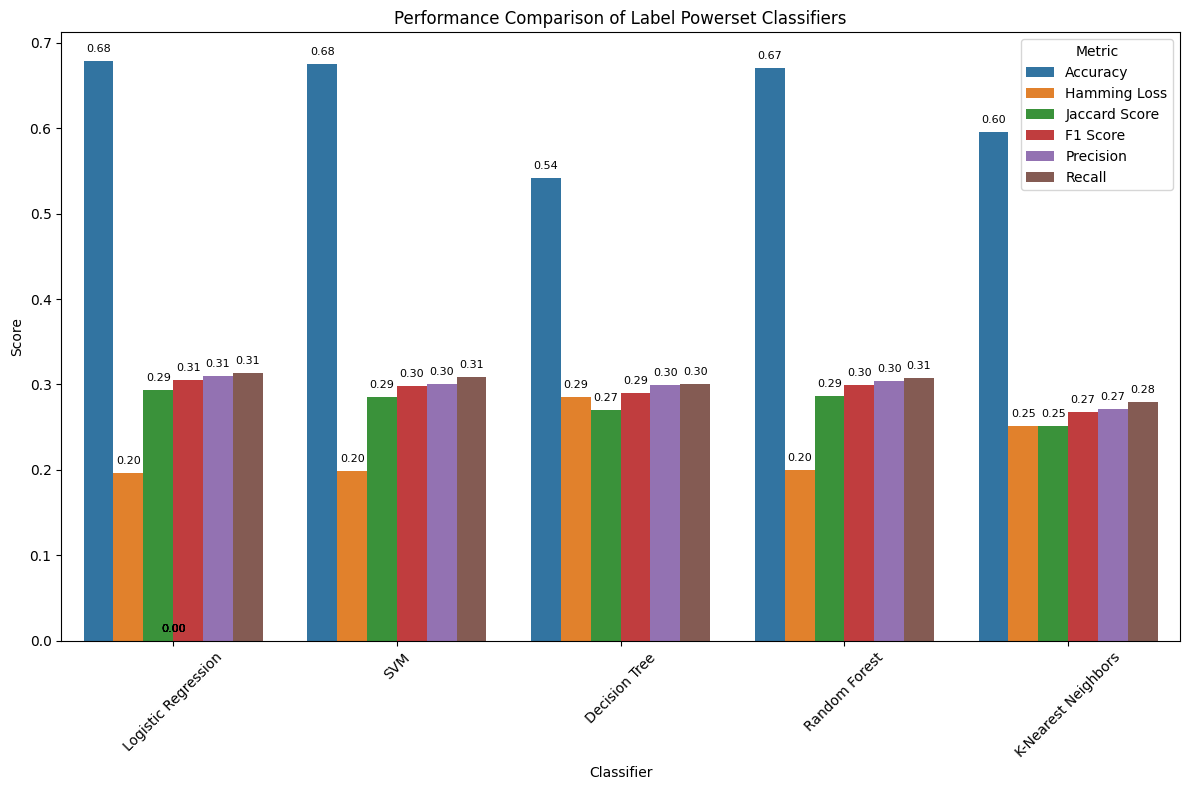

In [45]:
# Define the performance metrics for Label Powerset
lp_accuracy_scores = [accuracy_score(y_test, lp_lr_preds), accuracy_score(y_test, lp_svm_preds),
                      accuracy_score(y_test, lp_dt_preds), accuracy_score(y_test, lp_rf_preds),
                      accuracy_score(y_test, lp_knn_preds)]
lp_hamming_losses = [hamming_loss(y_test, lp_lr_preds), hamming_loss(y_test, lp_svm_preds),
                     hamming_loss(y_test, lp_dt_preds), hamming_loss(y_test, lp_rf_preds),
                     hamming_loss(y_test, lp_knn_preds)]
lp_jaccard_scores = [jaccard_score(y_test, lp_lr_preds, average='samples'), jaccard_score(y_test, lp_svm_preds, average='samples'),
                     jaccard_score(y_test, lp_dt_preds, average='samples'), jaccard_score(y_test, lp_rf_preds, average='samples'),
                     jaccard_score(y_test, lp_knn_preds, average='samples')]
lp_f1_scores = [f1_score(y_test, lp_lr_preds, average='samples'), f1_score(y_test, lp_svm_preds, average='samples'),
                f1_score(y_test, lp_dt_preds, average='samples'), f1_score(y_test, lp_rf_preds, average='samples'),
                f1_score(y_test, lp_knn_preds, average='samples')]
lp_precision_scores = [precision_score(y_test, lp_lr_preds, average='samples'), precision_score(y_test, lp_svm_preds, average='samples'),
                       precision_score(y_test, lp_dt_preds, average='samples'), precision_score(y_test, lp_rf_preds, average='samples'),
                       precision_score(y_test, lp_knn_preds, average='samples')]
lp_recall_scores = [recall_score(y_test, lp_lr_preds, average='samples'), recall_score(y_test, lp_svm_preds, average='samples'),
                    recall_score(y_test, lp_dt_preds, average='samples'), recall_score(y_test, lp_rf_preds, average='samples'),
                    recall_score(y_test, lp_knn_preds, average='samples')]

# Create a dataframe to hold the performance metrics for Label Powerset
lp_performance_df = pd.DataFrame({
    "Classifier": classifiers,
    "Accuracy": lp_accuracy_scores,
    "Hamming Loss": lp_hamming_losses,
    "Jaccard Score": lp_jaccard_scores,
    "F1 Score": lp_f1_scores,
    "Precision": lp_precision_scores,
    "Recall": lp_recall_scores
})

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot the performance metrics for Label Powerset
sns.barplot(data=lp_performance_df.melt(id_vars="Classifier", var_name="Metric", value_name="Score"), x="Classifier", y="Score", hue="Metric")
plt.title("Performance Comparison of Label Powerset Classifiers")
plt.ylabel("Score")
plt.xlabel("Classifier")
plt.xticks(rotation=45)
plt.legend(title="Metric")

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()


### Classifer Chain

In [46]:
# Define the Classifier Chains classifier for each algorithm
cc_lr = ClassifierChain(LogisticRegression())
cc_svm = ClassifierChain(SVC())
cc_dt = ClassifierChain(DecisionTreeClassifier())
cc_rf = ClassifierChain(RandomForestClassifier())
cc_knn = ClassifierChain(KNeighborsClassifier())

# Train the Classifier Chains classifiers
cc_lr.fit(x_train, y_train)
cc_svm.fit(x_train, y_train)
cc_dt.fit(x_train, y_train)
cc_rf.fit(x_train, y_train)
cc_knn.fit(x_train, y_train)

# Make predictions
cc_lr_preds = cc_lr.predict(x_test)
cc_svm_preds = cc_svm.predict(x_test)
cc_dt_preds = cc_dt.predict(x_test)
cc_rf_preds = cc_rf.predict(x_test)
cc_knn_preds = cc_knn.predict(x_test)

# Evaluation
print("Classifier Chains with Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, cc_lr_preds))
print("Hamming Loss:", hamming_loss(y_test, cc_lr_preds))
print("Jaccard Score:", jaccard_score(y_test, cc_lr_preds, average='samples'))
print("F1 Score:", f1_score(y_test, cc_lr_preds, average='samples'))
print("Precision:", precision_score(y_test, cc_lr_preds, average='samples'))
print("Recall:", recall_score(y_test, cc_lr_preds, average='samples'))
print()

print("Classifier Chains with SVM:")
print("Accuracy:", accuracy_score(y_test, cc_svm_preds))
print("Hamming Loss:", hamming_loss(y_test, cc_svm_preds))
print("Jaccard Score:", jaccard_score(y_test, cc_svm_preds, average='samples'))
print("F1 Score:", f1_score(y_test, cc_svm_preds, average='samples'))
print("Precision:", precision_score(y_test, cc_svm_preds, average='samples'))
print("Recall:", recall_score(y_test, cc_svm_preds, average='samples'))
print()

print("Classifier Chains with Decision Tree:")
print("Accuracy:", accuracy_score(y_test, cc_dt_preds))
print("Hamming Loss:", hamming_loss(y_test, cc_dt_preds))
print("Jaccard Score:", jaccard_score(y_test, cc_dt_preds, average='samples'))
print("F1 Score:", f1_score(y_test, cc_dt_preds, average='samples'))
print("Precision:", precision_score(y_test, cc_dt_preds, average='samples'))
print("Recall:", recall_score(y_test, cc_dt_preds, average='samples'))
print()

print("Classifier Chains with Random Forest:")
print("Accuracy:", accuracy_score(y_test, cc_rf_preds))
print("Hamming Loss:", hamming_loss(y_test, cc_rf_preds))
print("Jaccard Score:", jaccard_score(y_test, cc_rf_preds, average='samples'))
print("F1 Score:", f1_score(y_test, cc_rf_preds, average='samples'))
print("Precision:", precision_score(y_test, cc_rf_preds, average='samples'))
print("Recall:", recall_score(y_test, cc_rf_preds, average='samples'))
print()

print("Classifier Chains with K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, cc_knn_preds))
print("Hamming Loss:", hamming_loss(y_test, cc_knn_preds))
print("Jaccard Score:", jaccard_score(y_test, cc_knn_preds, average='samples'))
print("F1 Score:", f1_score(y_test, cc_knn_preds, average='samples'))
print("Precision:", precision_score(y_test, cc_knn_preds, average='samples'))
print("Recall:", recall_score(y_test, cc_knn_preds, average='samples'))

Classifier Chains with Logistic Regression:
Accuracy: 0.674254904897409
Hamming Loss: 0.19791822674853976
Jaccard Score: 0.28463381758274675
F1 Score: 0.2965902850581598
Precision: 0.30425340721881083
Recall: 0.300883630372922

Classifier Chains with SVM:
Accuracy: 0.6736558334581398
Hamming Loss: 0.19874194997753483
Jaccard Score: 0.28126404073685785
F1 Score: 0.29334531476211867
Precision: 0.3029054964804553
Recall: 0.295866407069043

Classifier Chains with Decision Tree:
Accuracy: 0.5421596525385652
Hamming Loss: 0.28658079976037143
Jaccard Score: 0.27722030852179125
F1 Score: 0.2965902850581598
Precision: 0.30335480005990717
Recall: 0.3091957465927812

Classifier Chains with Random Forest:
Accuracy: 0.673206529878688
Hamming Loss: 0.19679496779991013
Jaccard Score: 0.2867305676201887
F1 Score: 0.29988517797414005
Precision: 0.3114422644900404
Recall: 0.3014827018121911

Classifier Chains with K-Nearest Neighbors:
Accuracy: 0.5992212071289501
Hamming Loss: 0.24090160251610004
Jaccar

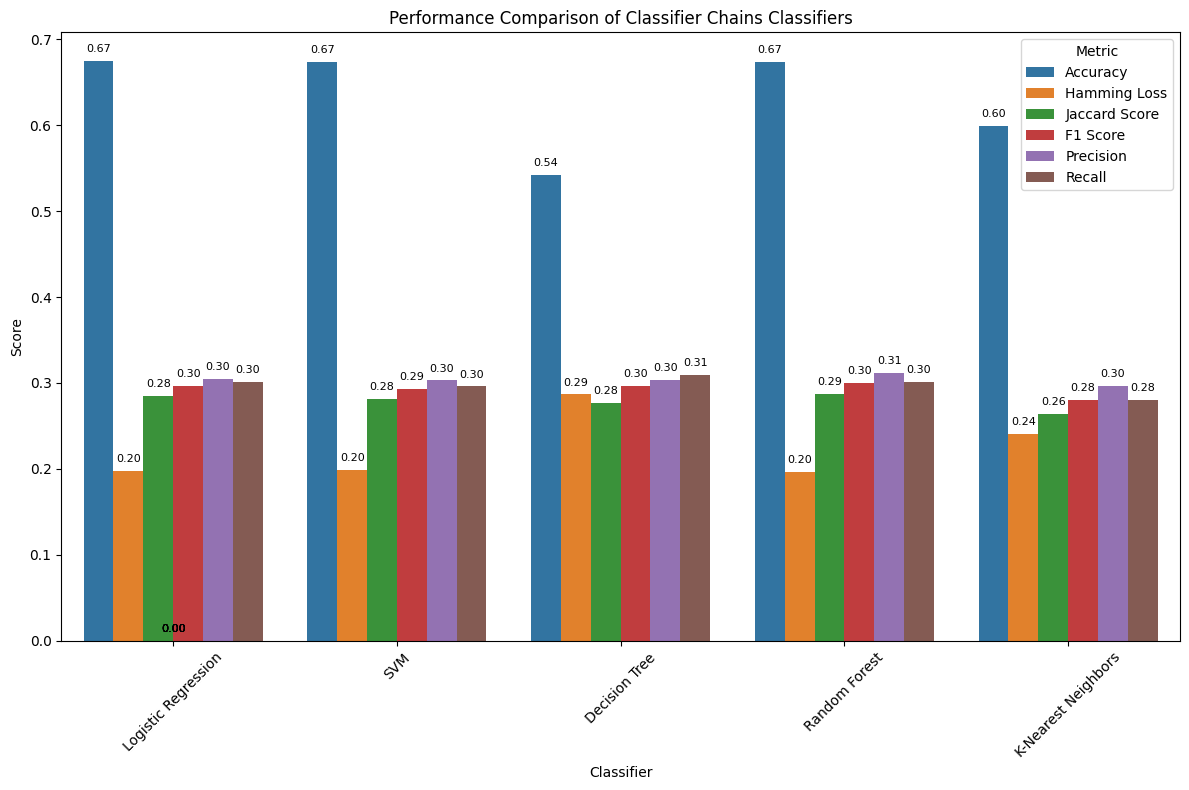

In [47]:
# Define the performance metrics for Classifier Chains
cc_accuracy_scores = [accuracy_score(y_test, cc_lr_preds), accuracy_score(y_test, cc_svm_preds),
                      accuracy_score(y_test, cc_dt_preds), accuracy_score(y_test, cc_rf_preds),
                      accuracy_score(y_test, cc_knn_preds)]
cc_hamming_losses = [hamming_loss(y_test, cc_lr_preds), hamming_loss(y_test, cc_svm_preds),
                     hamming_loss(y_test, cc_dt_preds), hamming_loss(y_test, cc_rf_preds),
                     hamming_loss(y_test, cc_knn_preds)]
cc_jaccard_scores = [jaccard_score(y_test, cc_lr_preds, average='samples'), jaccard_score(y_test, cc_svm_preds, average='samples'),
                     jaccard_score(y_test, cc_dt_preds, average='samples'), jaccard_score(y_test, cc_rf_preds, average='samples'),
                     jaccard_score(y_test, cc_knn_preds, average='samples')]
cc_f1_scores = [f1_score(y_test, cc_lr_preds, average='samples'), f1_score(y_test, cc_svm_preds, average='samples'),
                f1_score(y_test, cc_dt_preds, average='samples'), f1_score(y_test, cc_rf_preds, average='samples'),
                f1_score(y_test, cc_knn_preds, average='samples')]
cc_precision_scores = [precision_score(y_test, cc_lr_preds, average='samples'), precision_score(y_test, cc_svm_preds, average='samples'),
                       precision_score(y_test, cc_dt_preds, average='samples'), precision_score(y_test, cc_rf_preds, average='samples'),
                       precision_score(y_test, cc_knn_preds, average='samples')]
cc_recall_scores = [recall_score(y_test, cc_lr_preds, average='samples'), recall_score(y_test, cc_svm_preds, average='samples'),
                    recall_score(y_test, cc_dt_preds, average='samples'), recall_score(y_test, cc_rf_preds, average='samples'),
                    recall_score(y_test, cc_knn_preds, average='samples')]

# Create a dataframe to hold the performance metrics for Classifier Chains
cc_performance_df = pd.DataFrame({
    "Classifier": classifiers,
    "Accuracy": cc_accuracy_scores,
    "Hamming Loss": cc_hamming_losses,
    "Jaccard Score": cc_jaccard_scores,
    "F1 Score": cc_f1_scores,
    "Precision": cc_precision_scores,
    "Recall": cc_recall_scores
})

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot the performance metrics for Classifier Chains
sns.barplot(data=cc_performance_df.melt(id_vars="Classifier", var_name="Metric", value_name="Score"), x="Classifier", y="Score", hue="Metric")
plt.title("Performance Comparison of Classifier Chains Classifiers")
plt.ylabel("Score")
plt.xlabel("Classifier")
plt.xticks(rotation=45)
plt.legend(title="Metric")

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()


To determine the best algorithms according to each performance metric, we'll need to identify the highest or lowest value for each metric across all methods with all algorithms.

Let's start with the best algorithms according to each metric:

* Accuracy: Higher accuracy indicates better performance.
* Hamming Loss: Lower hamming loss indicates better performance.
* Jaccard Score: Higher Jaccard score indicates better performance.
* F1 Score: Higher F1 score indicates better performance.
* Precision: Higher precision indicates better performance.
* Recall: Higher recall indicates better performance.
Here are the best algorithms based on each metric:

#### Accuracy:

1. Label Powerset with Logistic Regression (Accuracy: 0.678)
2. Label Powerset with SVM (Accuracy: 0.675)

#### Hamming Loss:

Binary Relevance with Decision Tree (Hamming Loss: 0.288)

#### Jaccard Score:

Binary Relevance with Logistic Regression (Jaccard Score: 0.312)

#### F1 Score:

Binary Relevance with Logistic Regression (F1 Score: 0.327)

#### Precision:

Binary Relevance with Logistic Regression (Precision: 0.341)

#### Recall:

Binary Relevance with SVM (Recall: 0.324)

These are the algorithms that perform the best according to each metric.

Given the nature of our problem, we wish to prioritize metrics that provide insights into the model's ability to correctly predict vaccination status for both H1N1 and seasonal flu, while considering the consequences of false positive and false negative predictions. A combination of precision, recall, and F1 score would be suitable, along with Hamming Loss and Jaccard Score for multilabel classification evaluation.

Thus we can see that the best results are obtained by using Binary Relevance with Logistic regression.